In [ ]:
import numpy as np

In [ ]:
import kagglehub
import pandas as pd
import os


path = kagglehub.dataset_download("mczielinski/bitcoin-historical-data")


print("Files in dataset folder:")
print(os.listdir(path))

# Load CSV into DataFrame
csv_file = os.path.join(path, "btcusd_1-min_data.csv")
df = pd.read_csv(csv_file)

print(df.head())


Files in dataset folder:
['btcusd_1-min_data.csv']


<ipython-input-16-d057c8c31526>:14: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


      Timestamp  Open  High   Low  Close  Volume                   datetime
0  1.325412e+09  4.58  4.58  4.58   4.58     0.0  2012-01-01 10:01:00+00:00
1  1.325412e+09  4.58  4.58  4.58   4.58     0.0  2012-01-01 10:02:00+00:00
2  1.325412e+09  4.58  4.58  4.58   4.58     0.0  2012-01-01 10:03:00+00:00
3  1.325412e+09  4.58  4.58  4.58   4.58     0.0  2012-01-01 10:04:00+00:00
4  1.325412e+09  4.58  4.58  4.58   4.58     0.0  2012-01-01 10:05:00+00:00


In [ ]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6992361 entries, 0 to 6992360
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
 6   datetime   object 
dtypes: float64(6), object(1)
memory usage: 373.4+ MB


In [ ]:
df.shape

(6990923, 7)

In [ ]:
df

,Timestamp,Open,High,Low,Close,Volume,datetime
0,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:01:00+00:00
1,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:02:00+00:00
2,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:03:00+00:00
3,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:04:00+00:00
4,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:05:00+00:00
...,...,...,...,...,...,...,...
6990918,1.744937e+09,84891.00,84891.00,84891.00,84891.00,0.005840,NaN
6990919,1.744937e+09,84890.00,84890.00,84862.00,84863.00,0.022580,NaN
6990920,1.744937e+09,84863.00,84863.00,84863.00,84863.00,0.002700,NaN
6990921,1.744937e+09,84862.00,84862.00,84841.00,84845.00,0.008872,NaN


In [ ]:
df.isnull().sum()

,0
Timestamp,0
Open,0
High,0
Low,0
Close,0
Volume,0
datetime,208643


In [ ]:
# Calculate percentage of missing values
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

,0
Timestamp,0.000000
Open,0.000000
High,0.000000
Low,0.000000
Close,0.000000
Volume,0.000000
datetime,2.984484


In [ ]:
# Calculate total percentage of missing data
total_missing_percent = df.isnull().sum().sum() * 100 / df.size

print(f"Total percentage of missing data: {total_missing_percent:.2f}%")

Total percentage of missing data: 0.43%


In [ ]:
!pip install missingno

<Axes: >

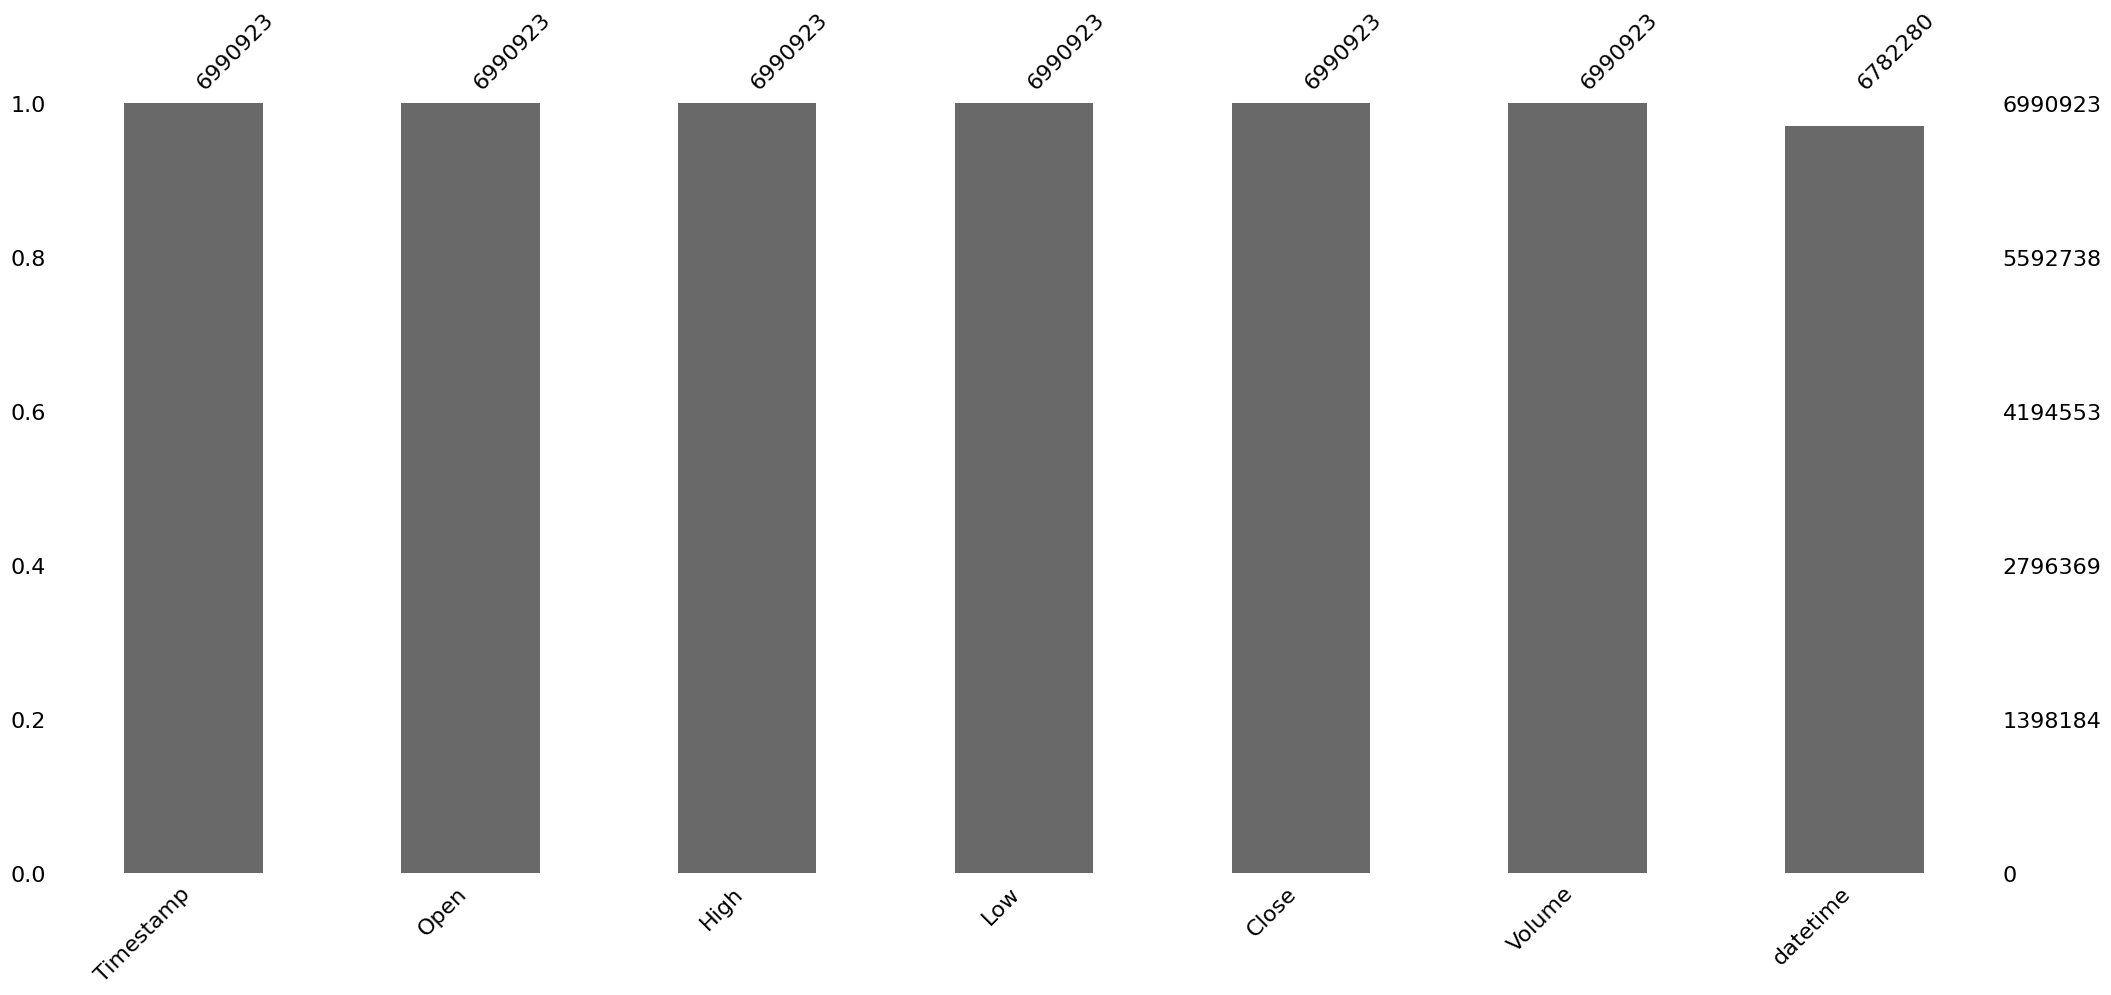

In [ ]:
import missingno as msno
msno.bar(df)

In [ ]:
# Drop rows where 'datetime' is NaN
df= df.dropna(subset=['datetime'])
df = df.reset_index(drop=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6782280 entries, 0 to 6782279
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
 6   datetime   object 
dtypes: float64(6), object(1)
memory usage: 362.2+ MB
None


In [ ]:
df

,Timestamp,Open,High,Low,Close,Volume,datetime
0,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:01:00+00:00
1,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:02:00+00:00
2,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:03:00+00:00
3,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:04:00+00:00
4,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:05:00+00:00
...,...,...,...,...,...,...,...
6782275,1.741997e+09,83989.00,83989.00,83989.00,83989.00,0.000125,2025-03-14 23:56:00+00:00
6782276,1.741997e+09,83979.00,83981.00,83978.00,83980.00,0.324026,2025-03-14 23:57:00+00:00
6782277,1.741997e+09,83979.00,83979.00,83978.00,83978.00,0.001201,2025-03-14 23:58:00+00:00
6782278,1.741997e+09,83968.00,83975.00,83968.00,83975.00,0.015713,2025-03-14 23:59:00+00:00


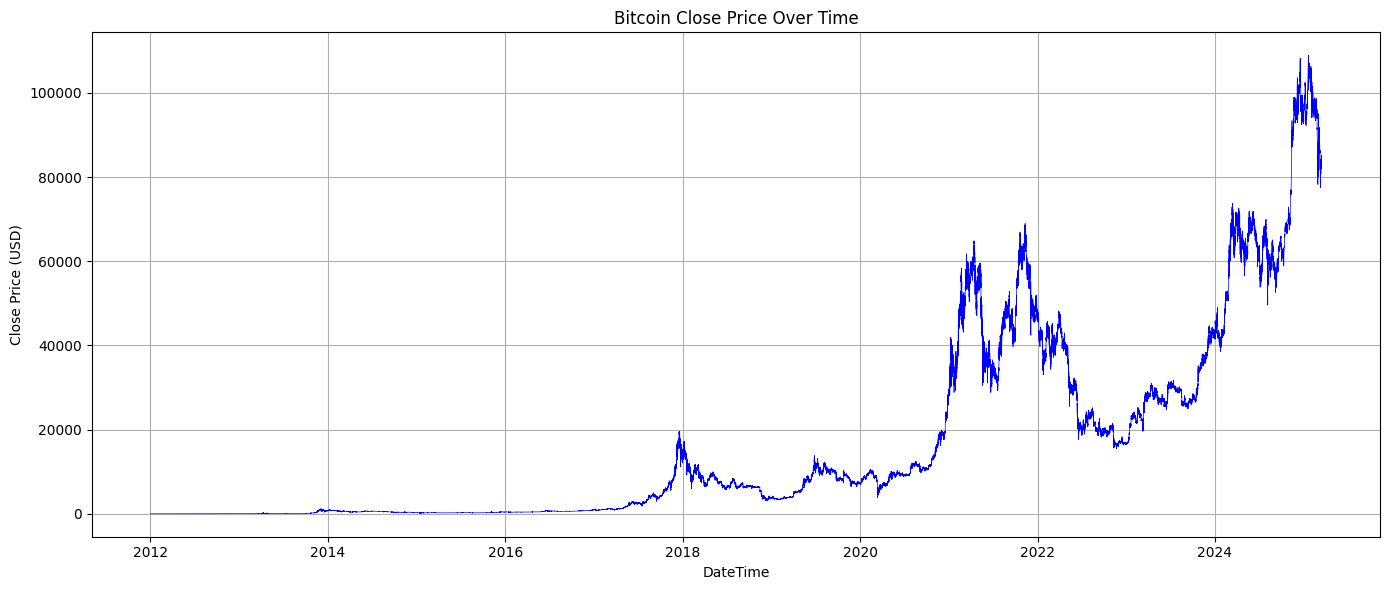

In [ ]:
import matplotlib.pyplot as plt

df['datetime'] = pd.to_datetime(df['datetime'])

df = df.dropna(subset=['datetime'])

# Plot time series
plt.figure(figsize=(14, 6))
plt.plot(df['datetime'], df['Close'], color='blue', linewidth=0.5)
plt.title('Bitcoin Close Price Over Time')
plt.xlabel('DateTime')
plt.ylabel('Close Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

df = df.set_index('datetime')
df = df.sort_index()

# Resample to hourly frequency and take the mean of numeric columns
df_hourly = df.resample('H').mean(numeric_only=True)

df_hourly = df_hourly.reset_index()

<ipython-input-19-41ce053b954e>:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('H').mean(numeric_only=True)


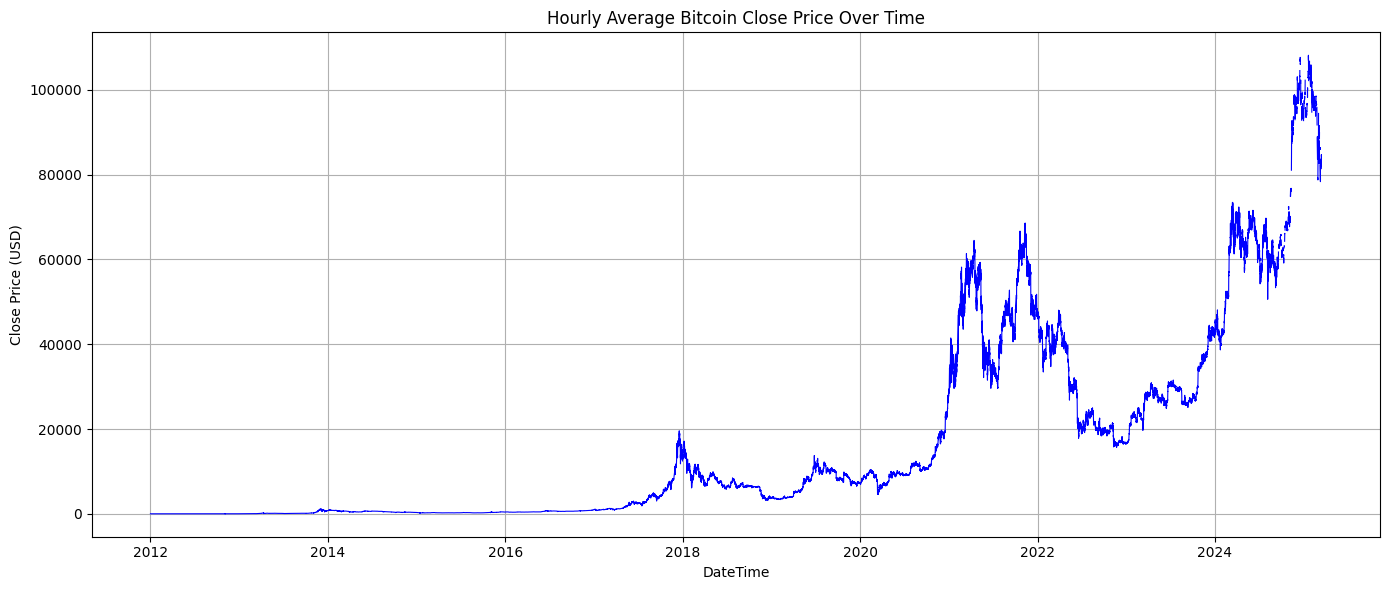

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(df_hourly['datetime'], df_hourly['Close'], color='blue', linewidth=0.8)
plt.title('Hourly Average Bitcoin Close Price Over Time')
plt.xlabel('DateTime')
plt.ylabel('Close Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:

if 'Timestamp' in df_hourly.columns:
    df_hourly = df_hourly.drop(columns=['Timestamp'])

In [ ]:
df_hourly

,datetime,Timestamp,Open,High,Low,Close,Volume
0,2012-01-01 10:00:00+00:00,1.325414e+09,4.580000,4.580000,4.580000,4.580000,0.000000
1,2012-01-01 11:00:00+00:00,1.325417e+09,4.580000,4.580000,4.580000,4.580000,0.000000
2,2012-01-01 12:00:00+00:00,1.325421e+09,4.580000,4.580000,4.580000,4.580000,0.000000
3,2012-01-01 13:00:00+00:00,1.325425e+09,4.580000,4.580000,4.580000,4.580000,0.000000
4,2012-01-01 14:00:00+00:00,1.325428e+09,4.580000,4.580000,4.580000,4.580000,0.000000
...,...,...,...,...,...,...,...
115714,2025-03-14 20:00:00+00:00,1.741984e+09,84187.800000,84210.816667,84158.983333,84184.950000,1.323356
115715,2025-03-14 21:00:00+00:00,1.741988e+09,84171.816667,84186.866667,84158.666667,84171.183333,0.964365
115716,2025-03-14 22:00:00+00:00,1.741991e+09,84334.433333,84347.016667,84322.816667,84335.666667,0.115607
115717,2025-03-14 23:00:00+00:00,1.741995e+09,84189.416667,84195.983333,84176.366667,84183.300000,0.263252


In [ ]:
df_hourly.describe()

,Open,High,Low,Close,Volume
count,113170.000000,113170.000000,113170.000000,113170.000000,113170.000000
mean,15185.608679,15192.081222,15178.942779,15185.633472,5.432884
std,20870.946554,20878.782990,20862.953523,20871.005529,9.692938
min,4.147333,4.147333,4.147333,4.147333,0.000000
25%,415.436875,415.523167,415.322250,415.439833,0.913107
50%,6338.219917,6340.277583,6336.527333,6338.198500,2.519367
75%,23845.812500,23853.879167,23839.341667,23847.616667,6.090160
max,108147.233333,108222.133333,108088.483333,108145.500000,342.520851


In [ ]:
df_hourly['price_up'] = (df_hourly['Close'].shift(-1) > df_hourly['Close']).astype(int)

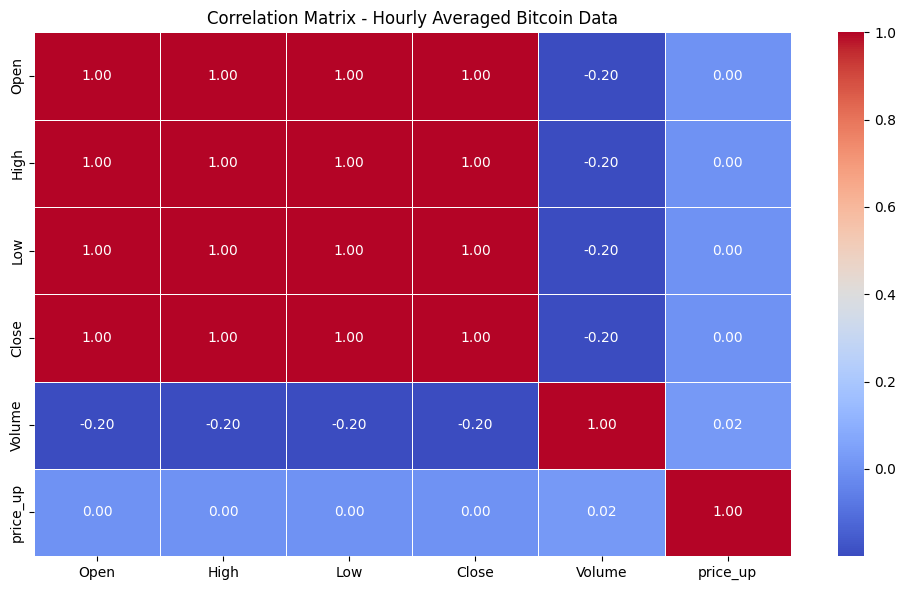

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df_hourly.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix - Hourly Averaged Bitcoin Data")
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on the 'Close' column
result = adfuller(df_hourly['Close'].dropna())  # dropna to remove any missing values

# Extract and print the results
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

# Interpretation
if result[1] < 0.05:
    print("The time series is likely stationary (reject H0).")
else:
    print("The time series is likely non-stationary (fail to reject H0).")


ADF Statistic: 0.3798276813828196
p-value: 0.9807246933053447
Critical Values: {'1%': np.float64(-3.4304078195455583), '5%': np.float64(-2.8615655553659005), '10%': np.float64(-2.566783602221344)}
The time series is likely non-stationary (fail to reject H0).


<ipython-input-30-9f4de42ac2db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hourly['MA_500'] = df_hourly['Close'].rolling(window=500).mean()
<ipython-input-30-9f4de42ac2db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hourly['MA_1000'] = df_hourly['Close'].rolling(window=1000).mean()


<Axes: title={'center': 'Bitcoin with Moving Averages'}>

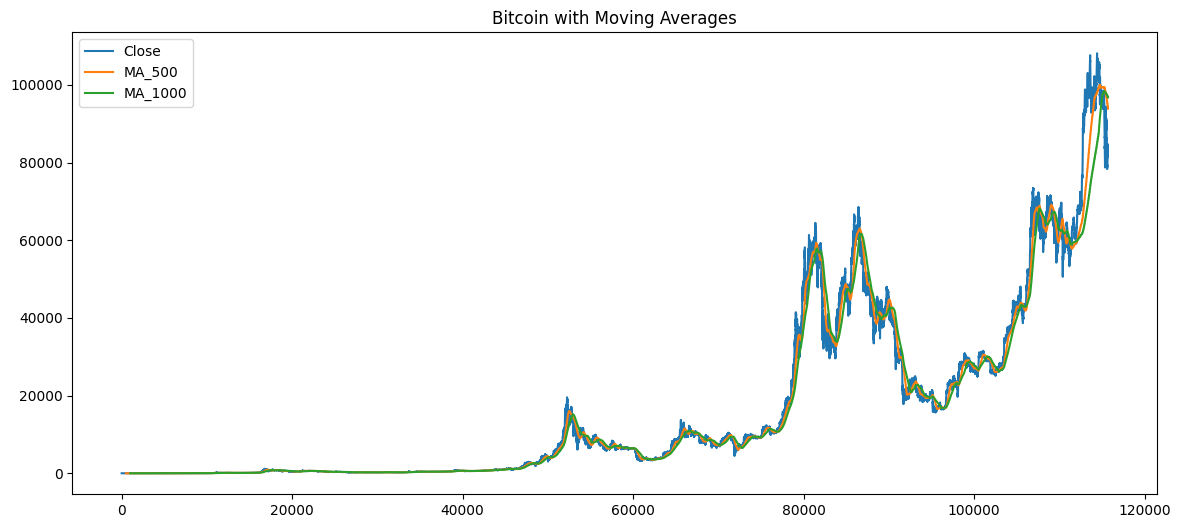

In [ ]:
df_hourly['MA_500'] = df_hourly['Close'].rolling(window=500).mean()
df_hourly['MA_1000'] = df_hourly['Close'].rolling(window=1000).mean()

df_hourly[['Close', 'MA_500', 'MA_1000']].plot(figsize=(14, 6), title='Bitcoin with Moving Averages')


In [ ]:
# Calculate the first difference of the 'Close' column
df_hourly['Close_diff'] = df_hourly['Close'].diff()


print(df_hourly[['datetime', 'Close', 'Close_diff']].head())

                   datetime  Close  Close_diff
0 2012-01-01 10:00:00+00:00   4.58         NaN
1 2012-01-01 11:00:00+00:00   4.58         0.0
2 2012-01-01 12:00:00+00:00   4.58         0.0
3 2012-01-01 13:00:00+00:00   4.58         0.0
4 2012-01-01 14:00:00+00:00   4.58         0.0


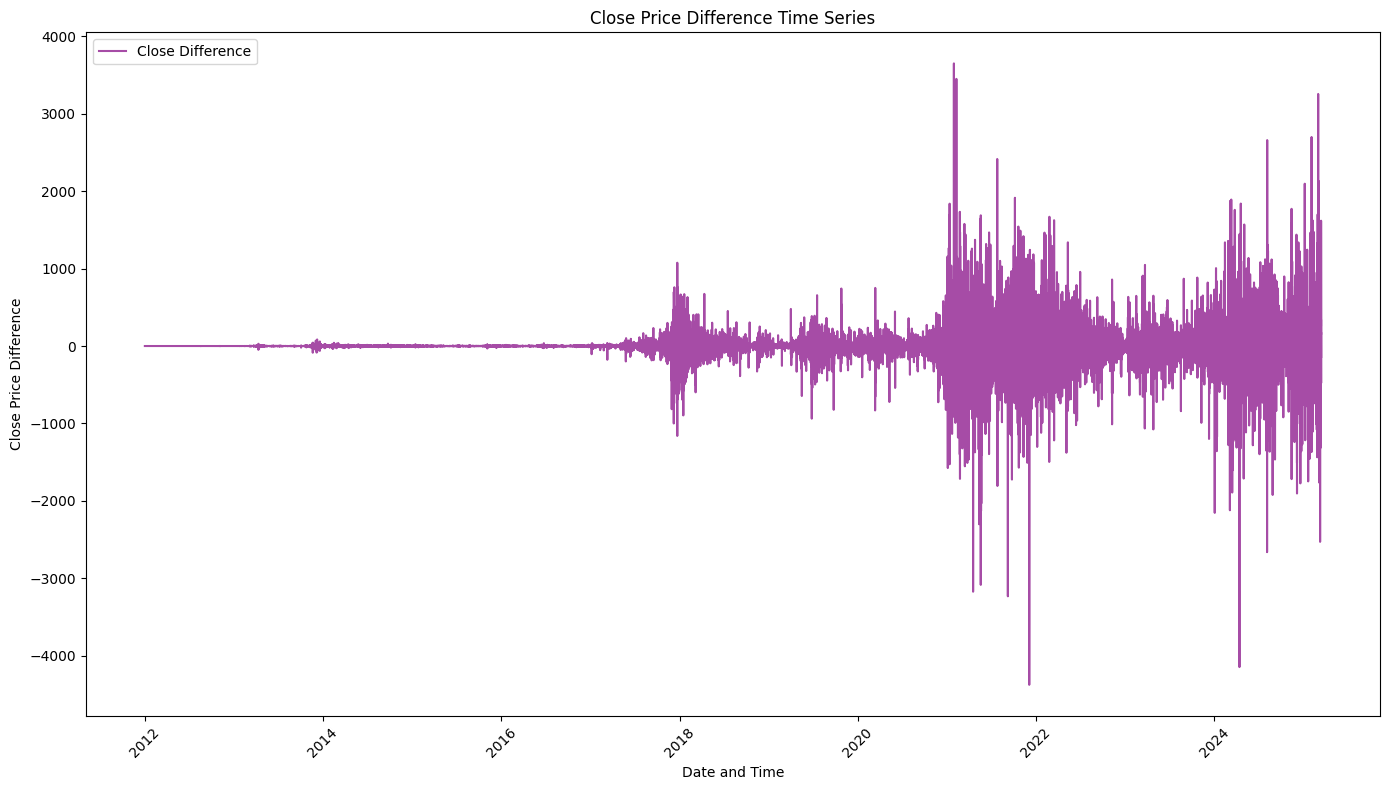

In [ ]:
# Plot the 'Close_diff' time series
plt.figure(figsize=(14, 8))
plt.plot(df_hourly['datetime'], df_hourly['Close_diff'], label='Close Difference', color='purple', alpha=0.7)


plt.title('Close Price Difference Time Series')
plt.xlabel('Date and Time')
plt.ylabel('Close Price Difference')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [ ]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 102.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 20.5 MB/s eta 0:00:00


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on the 'Close' column
result = adfuller(df_hourly['Close_diff'].dropna())


print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])


if result[1] < 0.05:
    print("The time series is likely stationary (reject H0).")
else:
    print("The time series is likely non-stationary (fail to reject H0).")


ADF Statistic: -39.53839311415952
p-value: 0.0
Critical Values: {'1%': np.float64(-3.4304078778848184), '5%': np.float64(-2.861565581150721), '10%': np.float64(-2.5667836159457393)}
The time series is likely stationary (reject H0).


In [ ]:

df_hourly = df_hourly.dropna(subset=['Close_diff'])


from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(df_hourly['Close_diff'], model='additive', period=24)

df_hourly.head()


,datetime,Open,High,Low,Close,Volume,price_up,Close_diff
1,2012-01-01 11:00:00+00:00,4.58,4.58,4.58,4.58,0.0,0,0.0
2,2012-01-01 12:00:00+00:00,4.58,4.58,4.58,4.58,0.0,0,0.0
3,2012-01-01 13:00:00+00:00,4.58,4.58,4.58,4.58,0.0,0,0.0
4,2012-01-01 14:00:00+00:00,4.58,4.58,4.58,4.58,0.0,0,0.0
5,2012-01-01 15:00:00+00:00,4.58,4.58,4.58,4.58,0.0,0,0.0


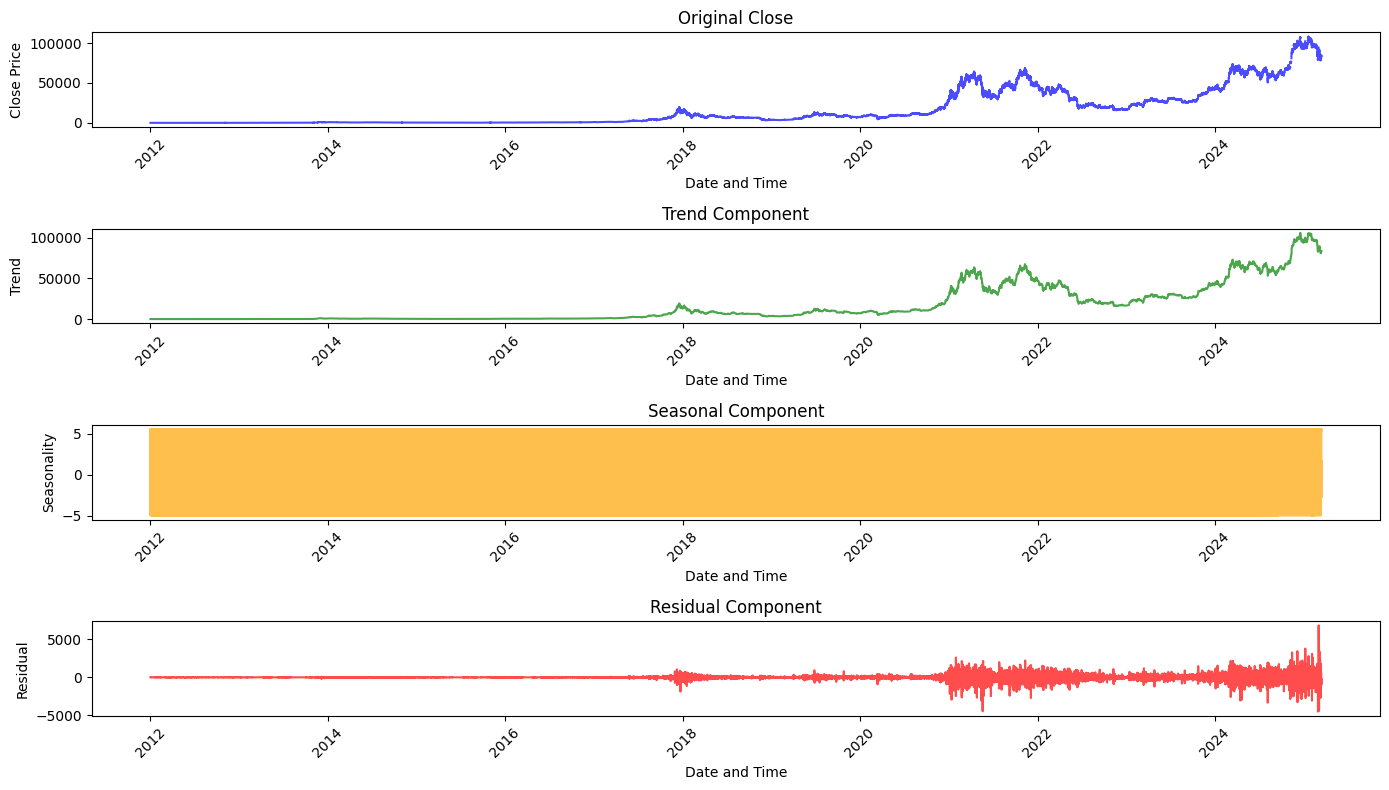

In [ ]:
result = seasonal_decompose(df_hourly['Close'].dropna(), model='additive', period=24)


result_trend = result.trend.dropna()
result_seasonal = result.seasonal.dropna()
result_resid = result.resid.dropna()

plt.figure(figsize=(14, 8))

plt.subplot(4, 1, 1)
plt.plot(df_hourly['datetime'], df_hourly['Close'], label='Original', color='blue', alpha=0.7)
plt.title('Original Close')
plt.xlabel('Date and Time')
plt.ylabel('Close Price')
plt.xticks(rotation=45)

# Plot the trend component
plt.subplot(4, 1, 2)
plt.plot(df_hourly['datetime'][result_trend.index], result_trend, label='Trend', color='green', alpha=0.7)
plt.title('Trend Component')
plt.xlabel('Date and Time')
plt.ylabel('Trend')
plt.xticks(rotation=45)

# Plot the seasonal component
plt.subplot(4, 1, 3)
plt.plot(df_hourly['datetime'][result_seasonal.index], result_seasonal, label='Seasonal', color='orange', alpha=0.7)
plt.title('Seasonal Component')
plt.xlabel('Date and Time')
plt.ylabel('Seasonality')
plt.xticks(rotation=45)

# Plot the residual component
plt.subplot(4, 1, 4)
plt.plot(df_hourly['datetime'][result_resid.index], result_resid, label='Residual', color='red', alpha=0.7)
plt.title('Residual Component')
plt.xlabel('Date and Time')
plt.ylabel('Residual')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


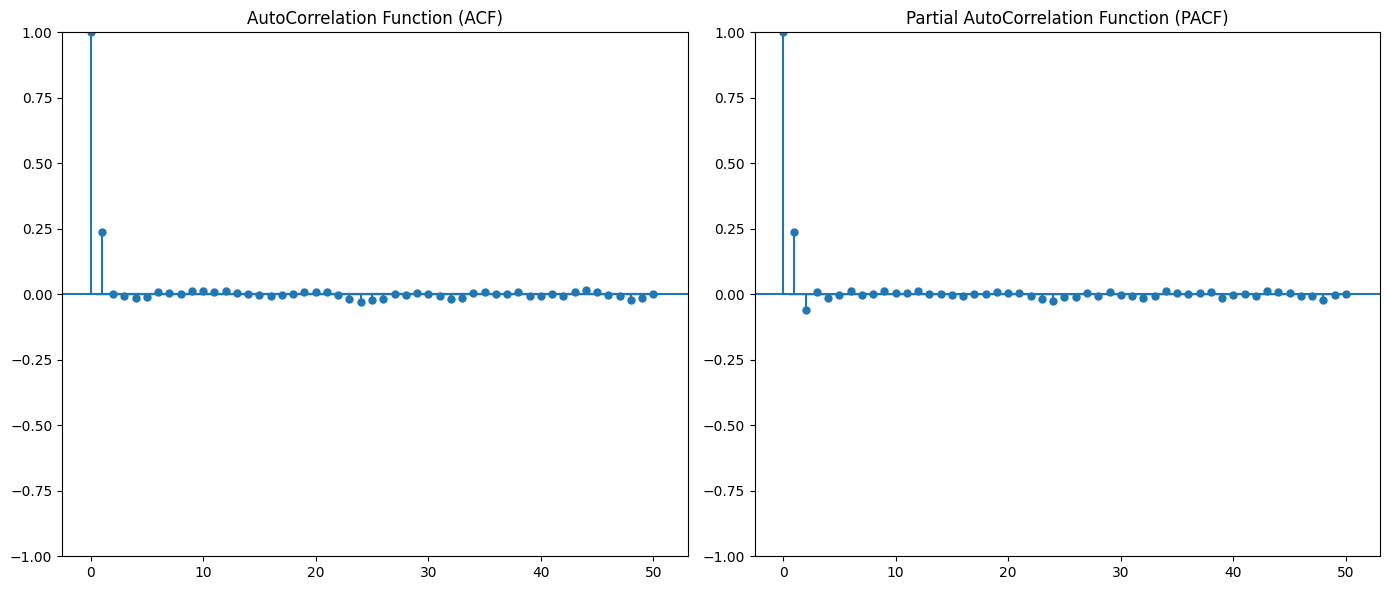

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


plt.figure(figsize=(14, 6))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(df_hourly['Close_diff'], lags=50, ax=plt.gca())  # Adjust the number of lags as needed
plt.title('AutoCorrelation Function (ACF)')

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(df_hourly['Close_diff'], lags=50, ax=plt.gca())  # Adjust the number of lags as needed
plt.title('Partial AutoCorrelation Function (PACF)')
plt.tight_layout()
plt.show()


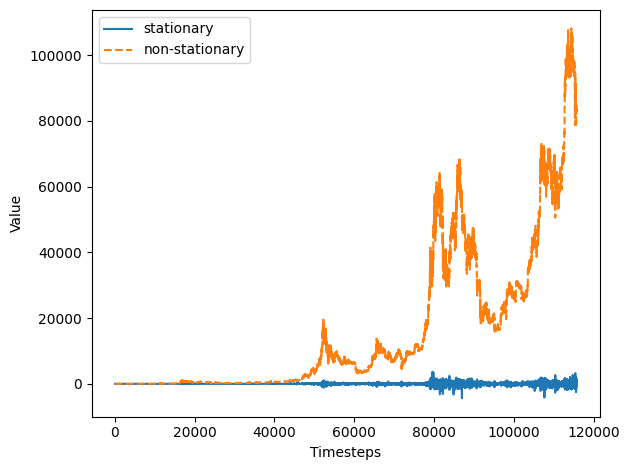

In [ ]:
fig, ax = plt.subplots()

ax.plot(df_hourly['Close_diff'], linestyle='-', label='stationary')
ax.plot(df_hourly['Close'], linestyle='--', label='non-stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.legend(loc=2)

plt.tight_layout()

In [ ]:
def mean_over_time(process: np.array) -> np.array:
    mean_func = []

    for i in range(len(process)):
        mean_func.append(np.mean(process[:i]))

    return mean_func

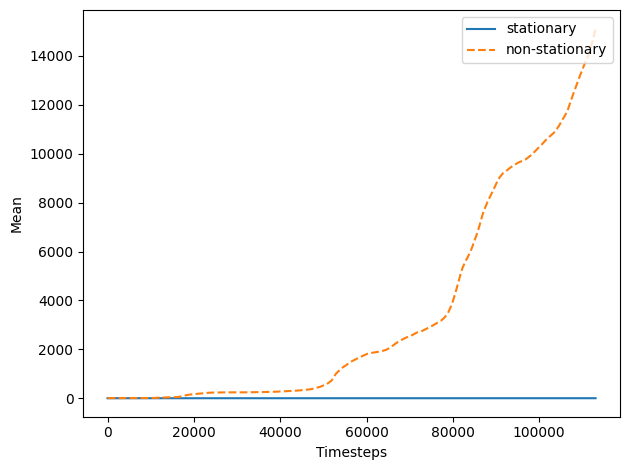

In [ ]:
stationary_mean = mean_over_time(df_hourly['Close_diff'])
non_stationary_mean = mean_over_time(df_hourly['Close'])
fig, ax = plt.subplots()

ax.plot(stationary_mean, label='stationary')
ax.plot(non_stationary_mean, linestyle='--', label='non-stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Mean')
ax.legend(loc=1)

plt.tight_layout()

In [ ]:
df_hourly['datetime'] = pd.to_datetime(df_hourly['datetime'])
df_hourly = df_hourly.sort_values('datetime')


last_date = df_hourly['datetime'].max()
split_date = last_date - pd.DateOffset(months=4)

# Create train and test sets
train = df_hourly[df_hourly['datetime'] < split_date]
test = df_hourly[df_hourly['datetime'] >= split_date]

print(f"Train size: {train.shape[0]} rows")
print(f"Test size: {test.shape[0]} rows")

Train size: 112838 rows
Test size: 2881 rows


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Close_diff   No. Observations:               112411
Model:                 ARIMA(0, 0, 2)   Log Likelihood             -709498.998
Date:                Fri, 18 Apr 2025   AIC                        1419005.996
Time:                        17:43:36   BIC                        1419044.516
Sample:                             0   HQIC                       1419017.625
                             - 112411                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7468      0.501      1.491      0.136      -0.235       1.728
ma.L1          0.2510      0.001    312.032      0.000       0.249       0.253
ma.L2         -0.0023      0.001     -2.415      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


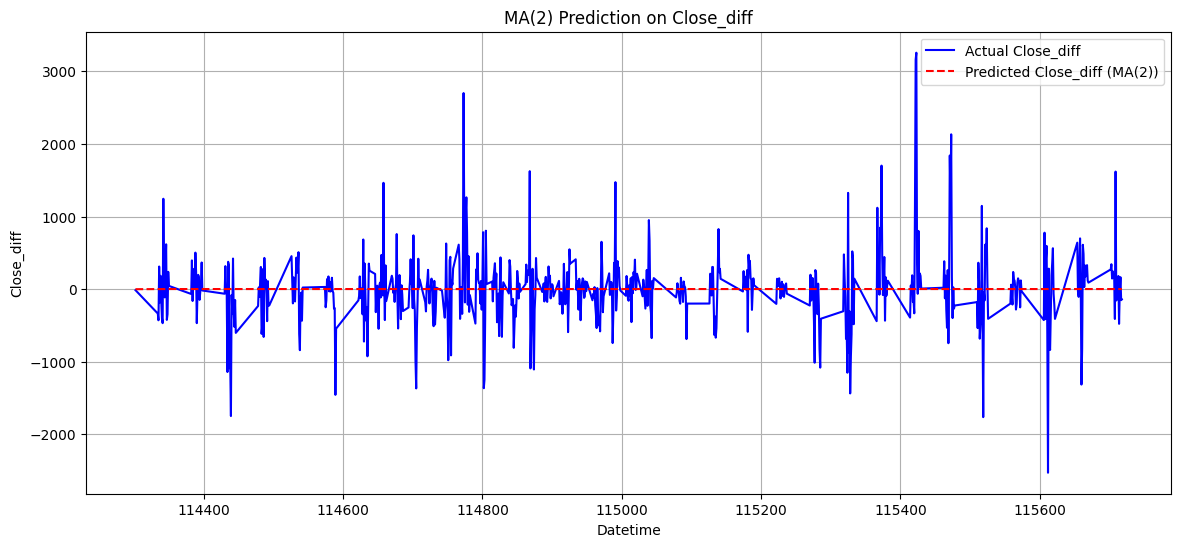

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

y_train = train['Close_diff']
y_test = test['Close_diff']

# Fit MA(2) model to Close_diff
model = ARIMA(y_train, order=(0, 0, 2))
results = model.fit()
print(results.summary())

forecast = results.forecast(steps=len(y_test))

plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test, label='Actual Close_diff', color='blue')
plt.plot(y_test.index, forecast, label='Predicted Close_diff (MA(2))', color='red', linestyle='--')
plt.title("MA(2) Prediction on Close_diff")
plt.xlabel("Datetime")
plt.ylabel("Close_diff")
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Close_diff   No. Observations:               112411
Model:                 ARIMA(2, 0, 0)   Log Likelihood             -709509.637
Date:                Fri, 18 Apr 2025   AIC                        1419027.274
Time:                        17:45:44   BIC                        1419065.793
Sample:                             0   HQIC                       1419038.902
                             - 112411                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7468      0.496      1.506      0.132      -0.225       1.719
ar.L1          0.2502      0.001    308.772      0.000       0.249       0.252
ar.L2         -0.0617      0.001    -63.823      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


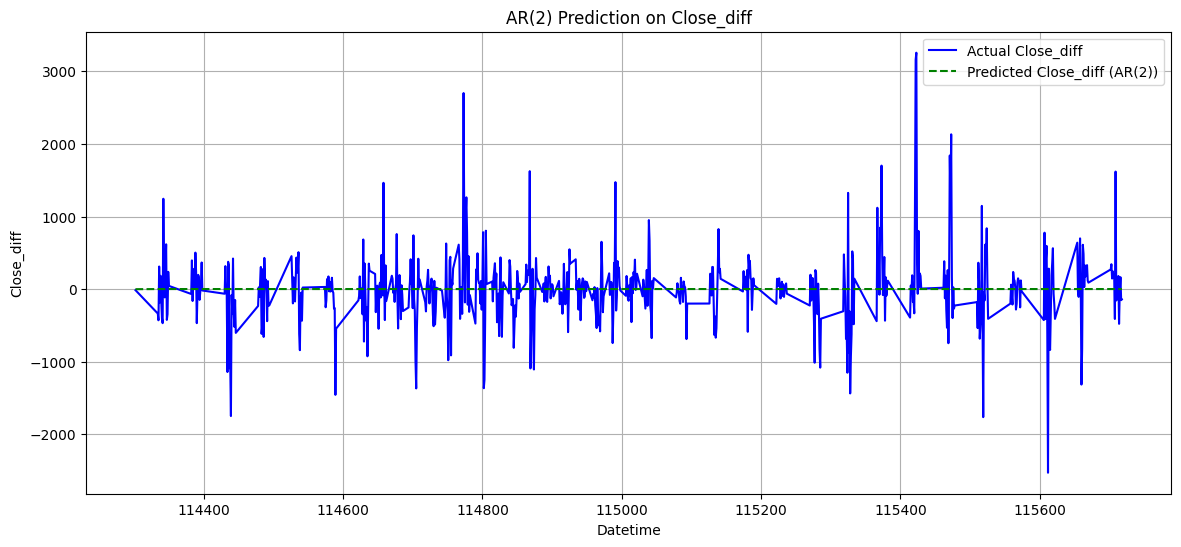

In [ ]:
y_train = train['Close_diff']
y_test = test['Close_diff']

# Fit AR(2) model: ARIMA(p=2, d=0, q=0)
model = ARIMA(y_train, order=(2, 0, 0))
results = model.fit()
print(results.summary())


forecast = results.forecast(steps=len(y_test))

plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test, label='Actual Close_diff', color='blue')
plt.plot(y_test.index, forecast, label='Predicted Close_diff (AR(2))', color='green', linestyle='--')
plt.title("AR(2) Prediction on Close_diff")
plt.xlabel("Datetime")
plt.ylabel("Close_diff")
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Close_diff   No. Observations:               112411
Model:                 ARIMA(2, 0, 2)   Log Likelihood             -709495.940
Date:                Fri, 18 Apr 2025   AIC                        1419003.880
Time:                        17:46:19   BIC                        1419061.660
Sample:                             0   HQIC                       1419021.323
                             - 112411                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7468      0.499      1.497      0.134      -0.231       1.725
ar.L1          0.5644      0.089      6.330      0.000       0.390       0.739
ar.L2         -0.0200      0.005     -4.299      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


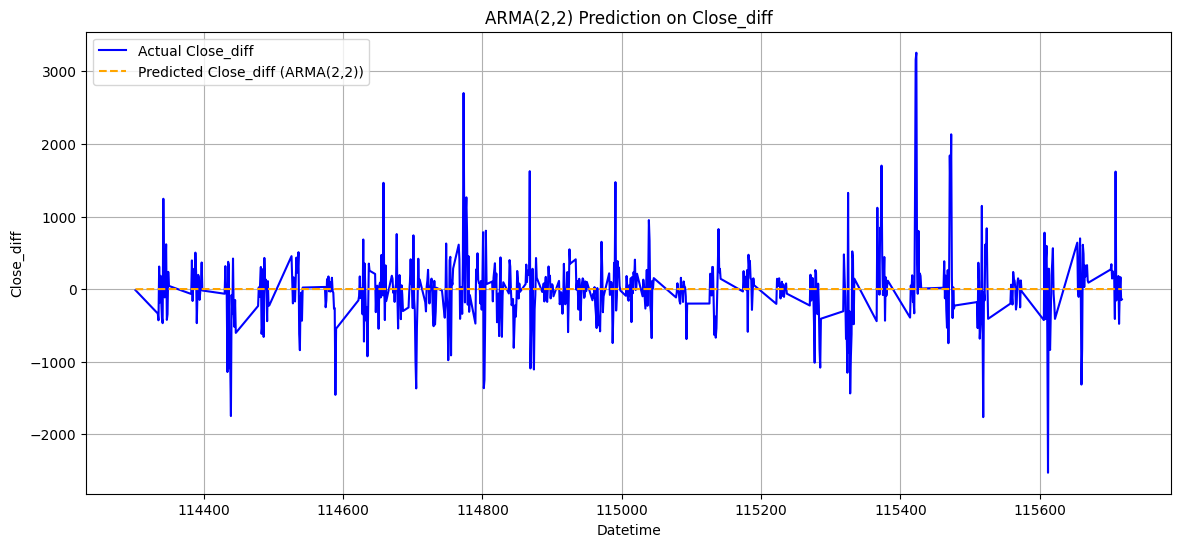

In [ ]:

y_train = train['Close_diff']
y_test = test['Close_diff']

# Fit ARMA(2,2) model: ARIMA(p=2, d=0, q=2)
model = ARIMA(y_train, order=(2, 0, 2))
results = model.fit()
print(results.summary())

forecast = results.forecast(steps=len(y_test))

plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test, label='Actual Close_diff', color='blue')
plt.plot(y_test.index, forecast, label='Predicted Close_diff (ARMA(2,2))', color='orange', linestyle='--')
plt.title("ARMA(2,2) Prediction on Close_diff")
plt.xlabel("Datetime")
plt.ylabel("Close_diff")
plt.legend()
plt.grid(True)
plt.show()


Top 5 (p, q) combinations with lowest AIC:
   p  q           aic
0  4  5  1.418941e+06
1  5  3  1.418964e+06
2  4  4  1.418967e+06
3  4  3  1.418968e+06
4  4  2  1.418971e+06


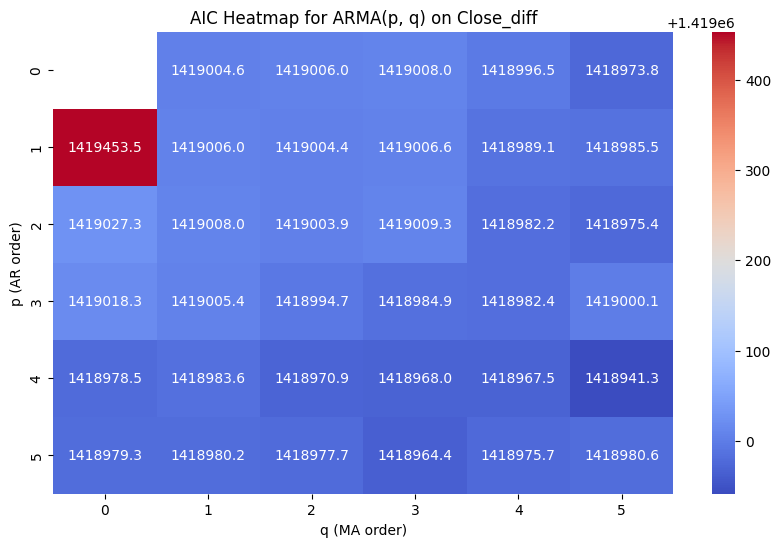

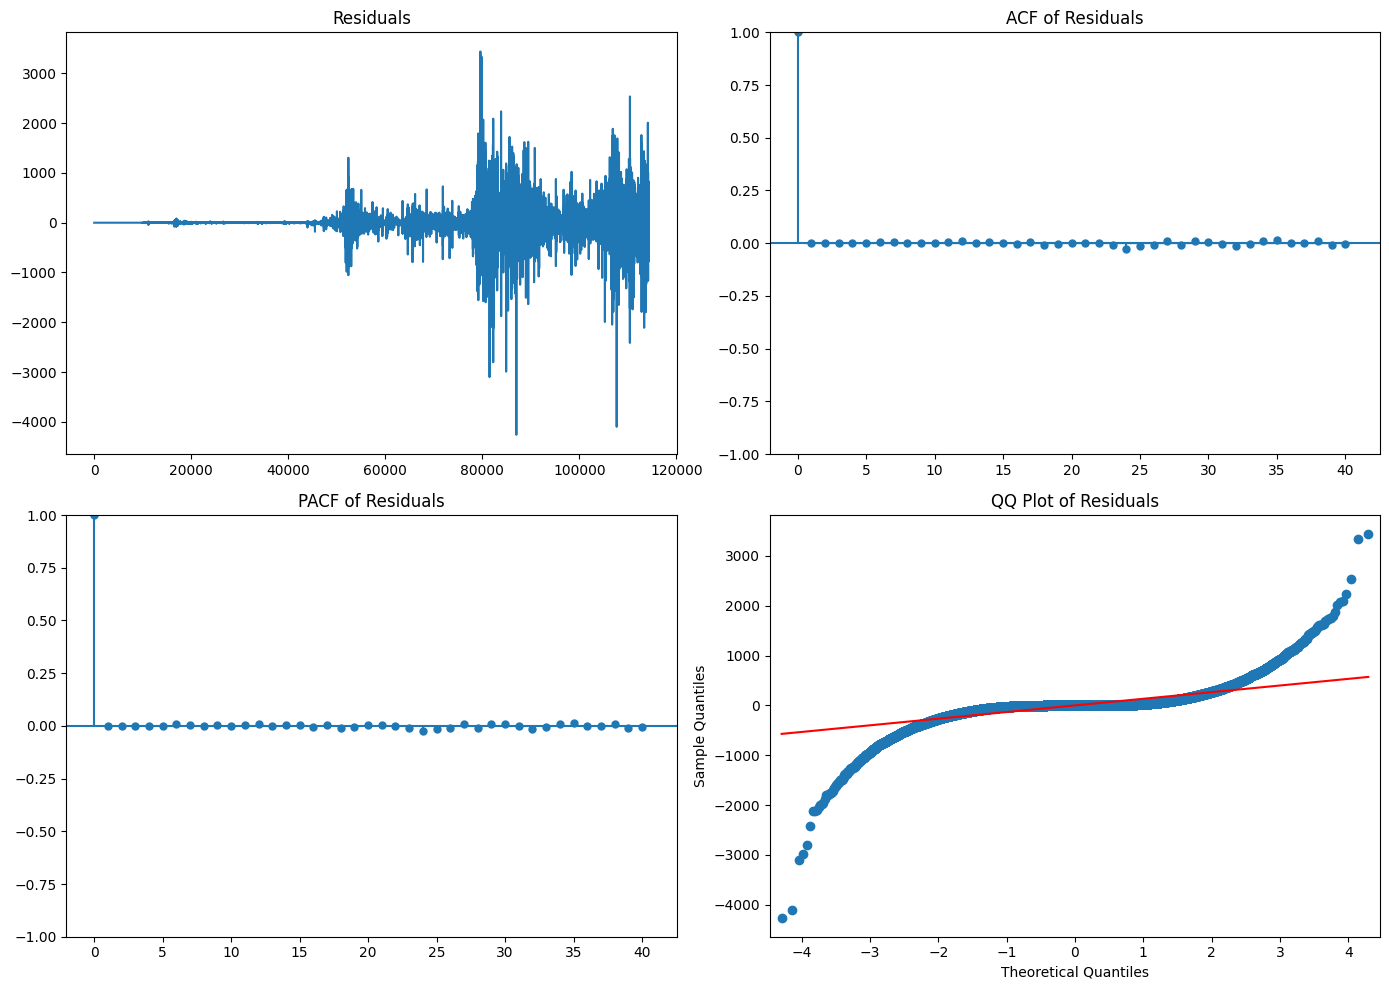

In [ ]:
import numpy as np
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import warnings
warnings.filterwarnings("ignore")


y_train = train['Close_diff'].dropna()

# Grid search for best (p, q) based on AIC
aic_results = []
max_p = 5
max_q = 5

for p in range(max_p + 1):
    for q in range(max_q + 1):
        try:
            model = ARIMA(y_train, order=(p, 0, q))
            results = model.fit()
            aic_results.append({'p': p, 'q': q, 'aic': results.aic})
        except:
            continue

aic_df = pd.DataFrame(aic_results).sort_values(by='aic').reset_index(drop=True)
print("Top 5 (p, q) combinations with lowest AIC:")
print(aic_df.head(5))

plt.figure(figsize=(10, 6))
pivot_table = aic_df.pivot(index='p', columns='q', values='aic')
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("AIC Heatmap for ARMA(p, q) on Close_diff")
plt.xlabel("q (MA order)")
plt.ylabel("p (AR order)")
plt.show()

best_p = aic_df.iloc[0]['p']
best_q = aic_df.iloc[0]['q']
best_model = ARIMA(y_train, order=(int(best_p), 0, int(best_q))).fit()

# Residual diagnostics
residuals = best_model.resid

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(residuals)
plt.title('Residuals')

plt.subplot(2, 2, 2)
plot_acf(residuals, ax=plt.gca(), lags=40)
plt.title('ACF of Residuals')

plt.subplot(2, 2, 3)
plot_pacf(residuals, ax=plt.gca(), lags=40)
plt.title('PACF of Residuals')

plt.subplot(2, 2, 4)
qqplot(residuals, line='s', ax=plt.gca())
plt.title('QQ Plot of Residuals')

plt.tight_layout()
plt.show()


                               SARIMAX Results                                
Dep. Variable:             Close_diff   No. Observations:               112838
Model:                 ARIMA(4, 0, 5)   Log Likelihood             -703922.530
Date:                Sat, 19 Apr 2025   AIC                        1407867.060
Time:                        22:20:36   BIC                        1407973.031
Sample:                             0   HQIC                       1407899.046
                             - 112838                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7228      0.486      1.488      0.137      -0.229       1.675
ar.L1          0.7644      0.022     35.538      0.000       0.722       0.807
ar.L2         -0.6536      0.013    -51.304      0.0

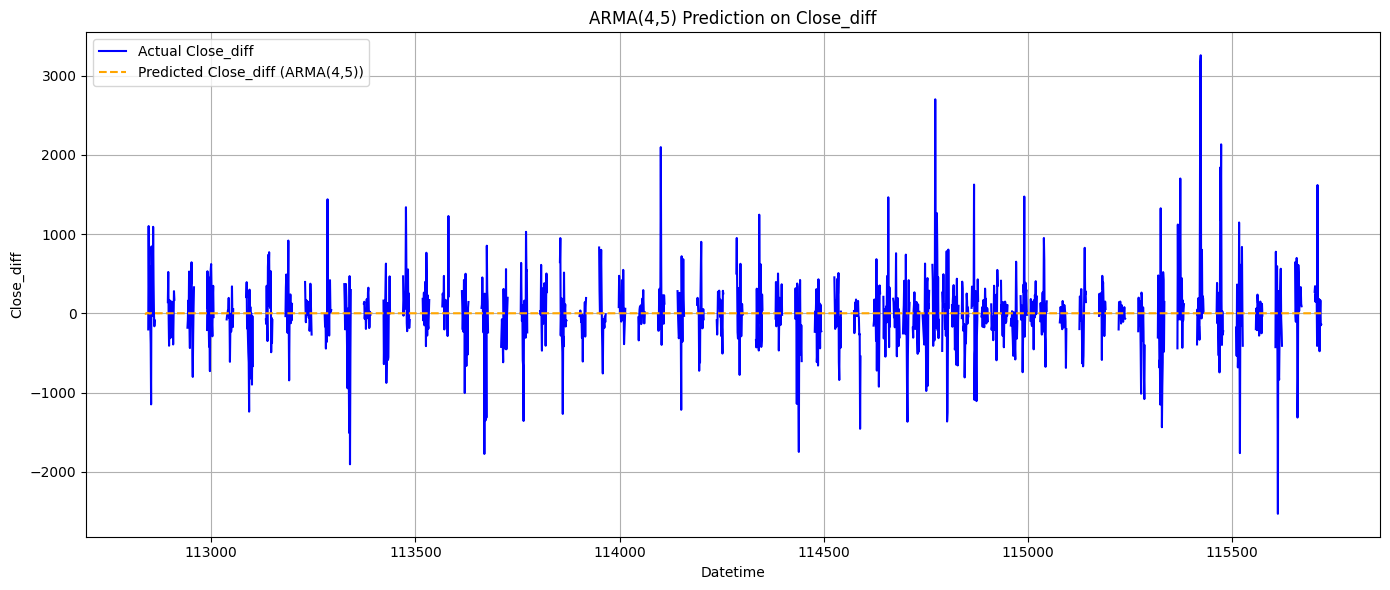


Evaluation Metrics:
RMSE: 458.5313
MAE: 302.5840
MSE: 210250.9419
R² Score: -0.0000


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_train = train['Close_diff']
y_test = test['Close_diff']

# Fit ARMA(4,5) model: ARIMA(p=4, d=0, q=5)
model = ARIMA(y_train, order=(4, 0, 5))
results = model.fit()
print(results.summary())

forecast = results.forecast(steps=len(y_test))

plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test, label='Actual Close_diff', color='blue')
plt.plot(y_test.index, forecast, label='Predicted Close_diff (ARMA(4,5))', color='orange', linestyle='--')
plt.title("ARMA(4,5) Prediction on Close_diff")
plt.xlabel("Datetime")
plt.ylabel("Close_diff")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

forecast_series = pd.Series(forecast, index=y_test.index)

combined = pd.concat([y_test, forecast_series], axis=1)
combined.columns = ['actual', 'predicted']
combined = combined.dropna()

# Evaluation metrics
mse = mean_squared_error(combined['actual'], combined['predicted'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(combined['actual'], combined['predicted'])
r2 = r2_score(combined['actual'], combined['predicted'])

print("\nEvaluation Metrics:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Top 5 ARIMA(p,d,q) combinations with lowest AIC:
   p  d  q           aic
0  4  1  2  1.436524e+06
1  4  1  4  1.436525e+06
2  4  1  3  1.436540e+06
3  4  1  1  1.436552e+06
4  4  1  0  1.436555e+06


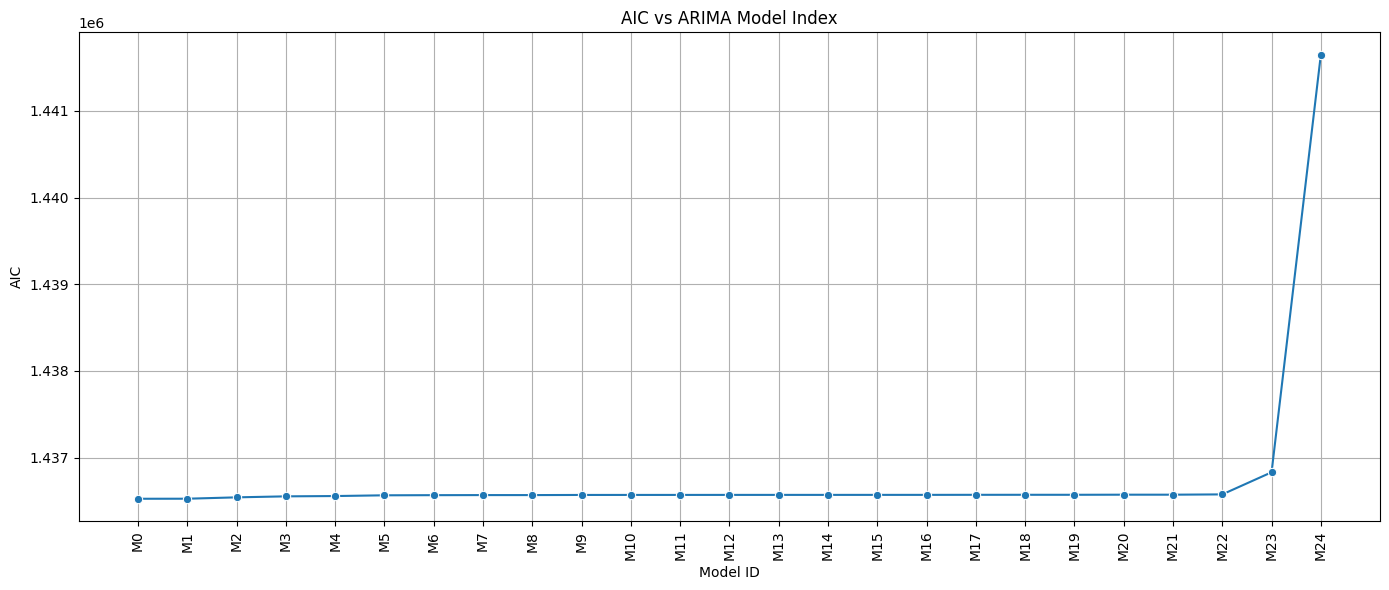


Best ARIMA Model Order: (4, 1, 2)

Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:               112485
Model:                 ARIMA(4, 1, 2)   Log Likelihood             -718255.032
Date:                Fri, 18 Apr 2025   AIC                        1436524.063
Time:                        20:01:50   BIC                        1436591.477
Sample:                             0   HQIC                       1436544.414
                             - 112485                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5910      0.003    171.644      0.000       0.584       0.598
ar.L2         -1.0978      0.004   -290.993      0.000      -1.105      -1.090
a

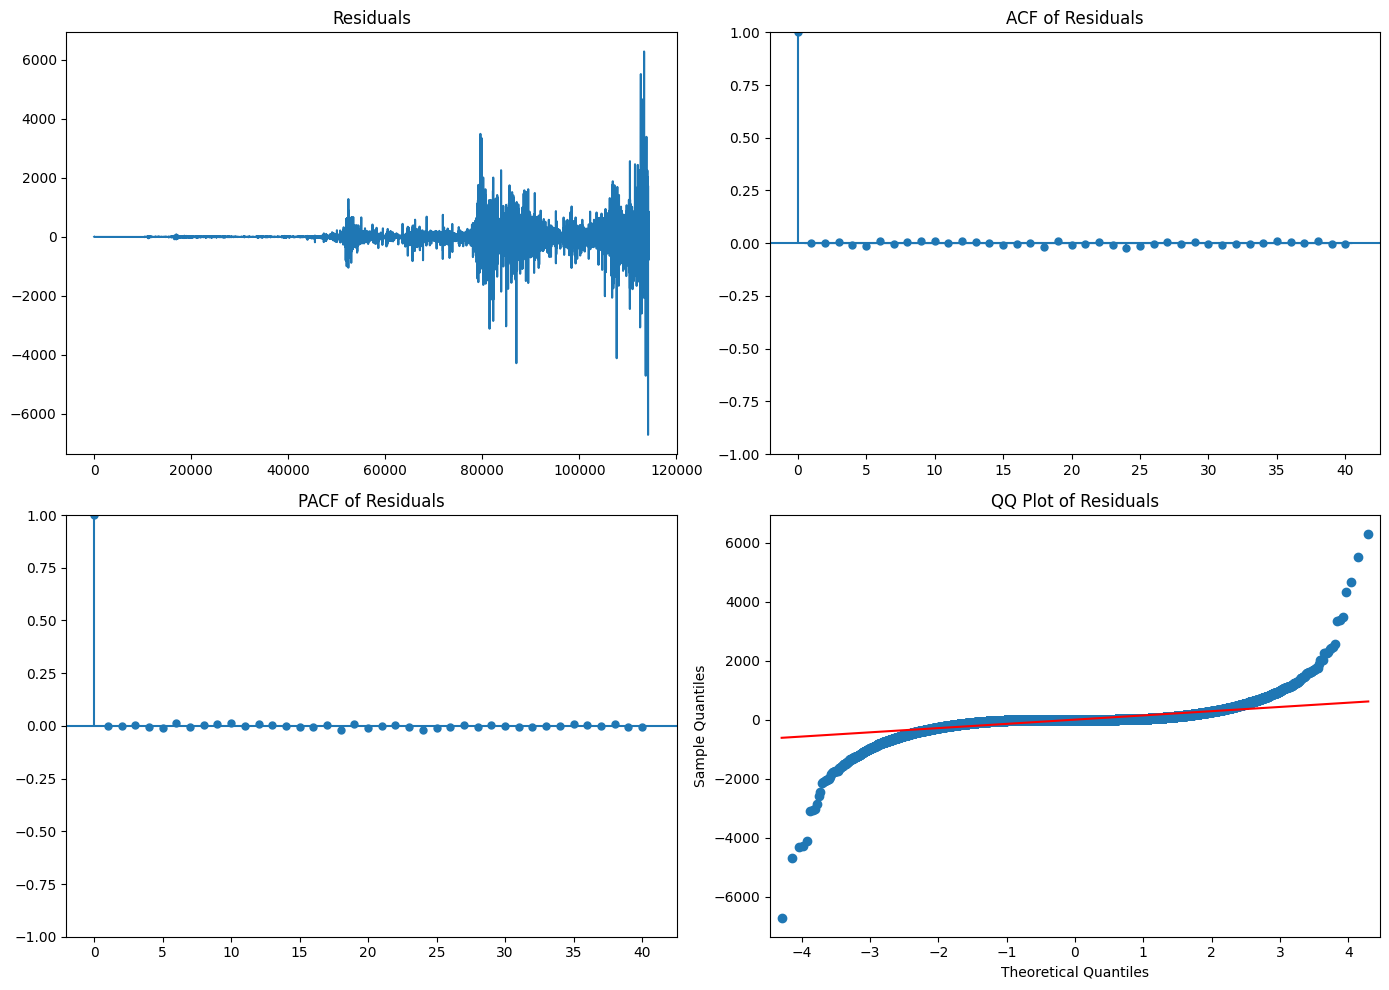

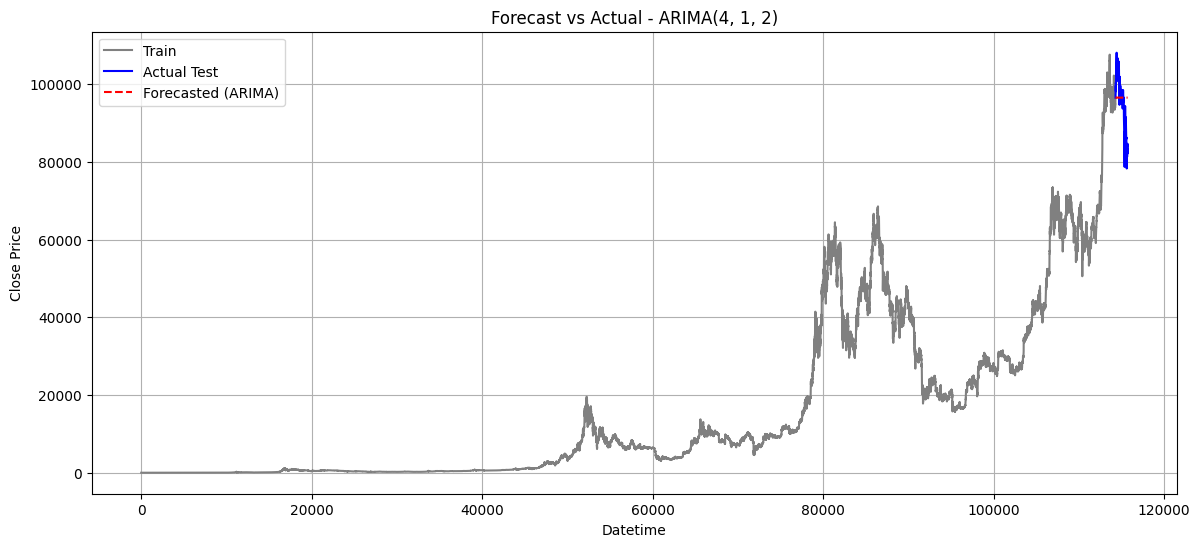

In [ ]:
y_train = train['Close'].dropna()
y_test = test['Close'].dropna()

# Grid search for ARIMA(p, 1, q) using AIC
max_p = 4
max_q = 4
aic_results = []
d = 1

for p in range(max_p + 1):
    for q in range(max_q + 1):
        try:
            model = ARIMA(y_train, order=(p, d, q))
            results = model.fit()
            aic_results.append({'p': p, 'd': d, 'q': q, 'aic': results.aic})
        except:
            continue

# Display top 5 combinations
aic_df = pd.DataFrame(aic_results).sort_values(by='aic').reset_index(drop=True)
print("Top 5 ARIMA(p,d,q) combinations with lowest AIC:")
print(aic_df.head(5))


aic_df['model_id'] = ['M' + str(i) for i in range(len(aic_df))]

plt.figure(figsize=(14, 6))
sns.lineplot(data=aic_df, x='model_id', y='aic', marker='o')
plt.xticks(rotation=90)
plt.title("AIC vs ARIMA Model Index")
plt.xlabel("Model ID")
plt.ylabel("AIC")
plt.grid(True)
plt.tight_layout()
plt.show()


best_model_info = aic_df.iloc[0]
best_p = int(best_model_info['p'])
best_q = int(best_model_info['q'])

print(f"\nBest ARIMA Model Order: ({best_p}, {d}, {best_q})\n")

best_model = ARIMA(y_train, order=(best_p, d, best_q)).fit()
print("Model Summary:")
print(best_model.summary())


residuals = best_model.resid

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(residuals)
plt.title('Residuals')

plt.subplot(2, 2, 2)
plot_acf(residuals, ax=plt.gca(), lags=40)
plt.title('ACF of Residuals')

plt.subplot(2, 2, 3)
plot_pacf(residuals, ax=plt.gca(), lags=40)
plt.title('PACF of Residuals')

plt.subplot(2, 2, 4)
qqplot(residuals, line='s', ax=plt.gca())
plt.title('QQ Plot of Residuals')

plt.tight_layout()
plt.show()

forecast = best_model.forecast(steps=len(y_test))

plt.figure(figsize=(14, 6))
plt.plot(y_train.index, y_train, label='Train', color='gray')
plt.plot(y_test.index, y_test, label='Actual Test', color='blue')
plt.plot(y_test.index, forecast, label='Forecasted (ARIMA)', color='red', linestyle='--')
plt.title(f"Forecast vs Actual - ARIMA({best_p}, {d}, {best_q})")
plt.xlabel("Datetime")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df_hourly['datetime'] = pd.to_datetime(df_hourly['datetime'])
df_hourly = df_hourly.sort_values('datetime')

df_daily = df_hourly.set_index('datetime').resample('D').mean().reset_index()

last_date = df_daily['datetime'].max()
split_date = last_date - pd.DateOffset(months=4)

# Create train and test sets
train = df_daily[df_daily['datetime'] < split_date]
test = df_daily[df_daily['datetime'] >= split_date]

# Display the size of each set
print(f"Train size: {train.shape[0]} rows")
print(f"Test size: {test.shape[0]} rows")


Train size: 4702 rows
Test size: 121 rows


Top 5 SARIMA(p,d,q)(P,D,Q,s) combinations with lowest AIC:
   p  d  q  P  D  Q           AIC                          order
0  0  1  2  0  1  1  74040.398586  (0.0,1.0,2.0)(0.0,1.0,1.0,24)
1  1  1  0  0  1  1  74041.508998  (1.0,1.0,0.0)(0.0,1.0,1.0,24)
2  0  1  2  1  1  1  74041.552870  (0.0,1.0,2.0)(1.0,1.0,1.0,24)
3  1  1  0  1  1  1  74042.648233  (1.0,1.0,0.0)(1.0,1.0,1.0,24)
4  2  1  1  1  1  1  74043.251242  (2.0,1.0,1.0)(1.0,1.0,1.0,24)


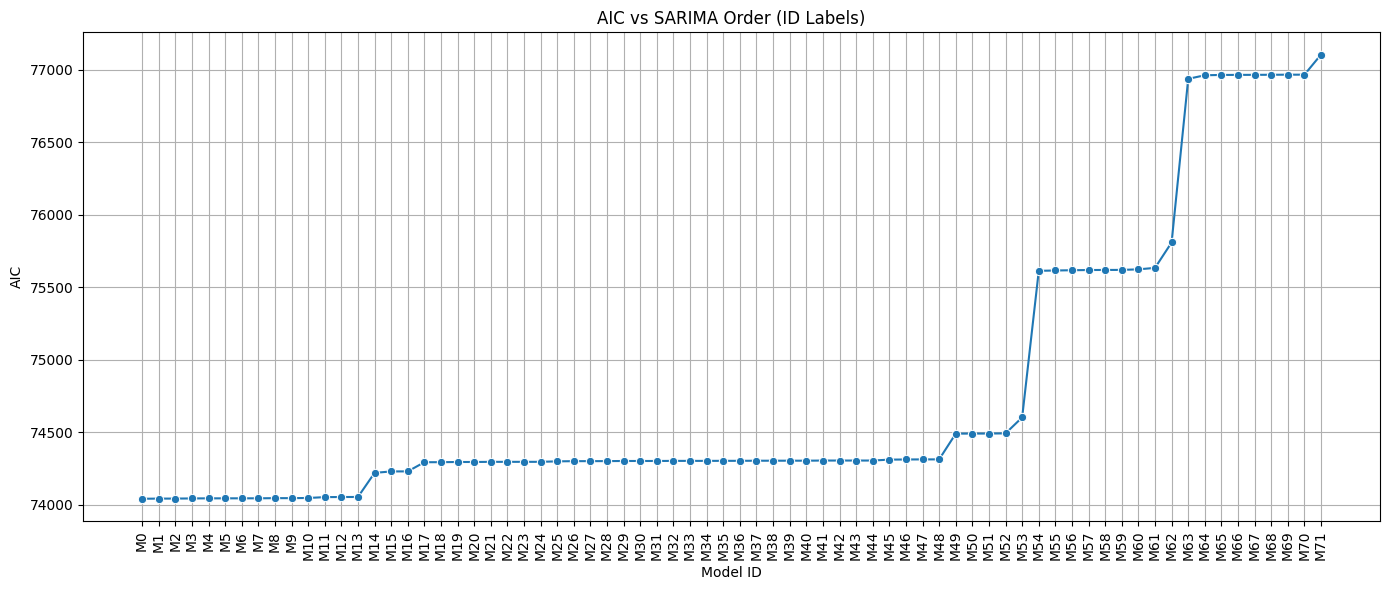

  model_id                          order
0       M0  (0.0,1.0,2.0)(0.0,1.0,1.0,24)
1       M1  (1.0,1.0,0.0)(0.0,1.0,1.0,24)
2       M2  (0.0,1.0,2.0)(1.0,1.0,1.0,24)
3       M3  (1.0,1.0,0.0)(1.0,1.0,1.0,24)
4       M4  (2.0,1.0,1.0)(1.0,1.0,1.0,24)
5       M5  (1.0,1.0,2.0)(1.0,1.0,1.0,24)
6       M6  (2.0,1.0,0.0)(0.0,1.0,1.0,24)
7       M7  (1.0,1.0,1.0)(0.0,1.0,1.0,24)
8       M8  (2.0,1.0,0.0)(1.0,1.0,1.0,24)
9       M9  (1.0,1.0,1.0)(1.0,1.0,1.0,24)

Best SARIMA Order: (0, 1, 2) Seasonal: (0, 1, 1, 24)

Model Summary:
                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                 4702
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 24)   Log Likelihood              -37016.199
Date:                              Fri, 18 Apr 2025   AIC                          74040.399
Time:                                      23:42:35   BIC                          74066.200
Sam

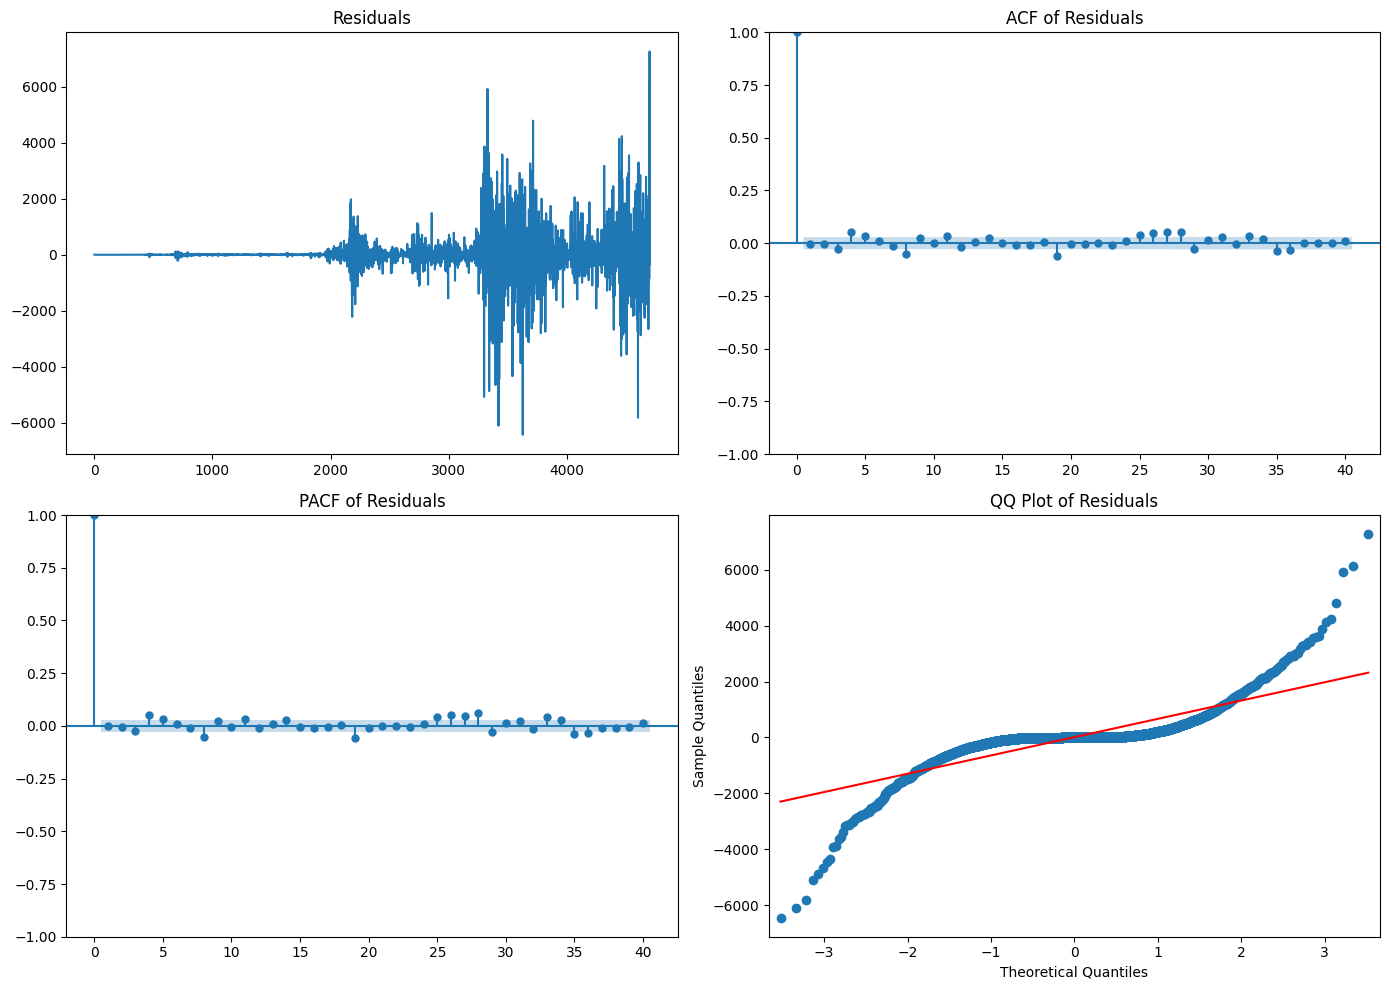


Evaluation Metrics on Test Set:
MAE  (Mean Absolute Error):           6589.07
RMSE (Root Mean Squared Error):       7501.86
MAPE (Mean Absolute Percentage Error): 6.81%
R²    (Coefficient of Determination):  -0.6591


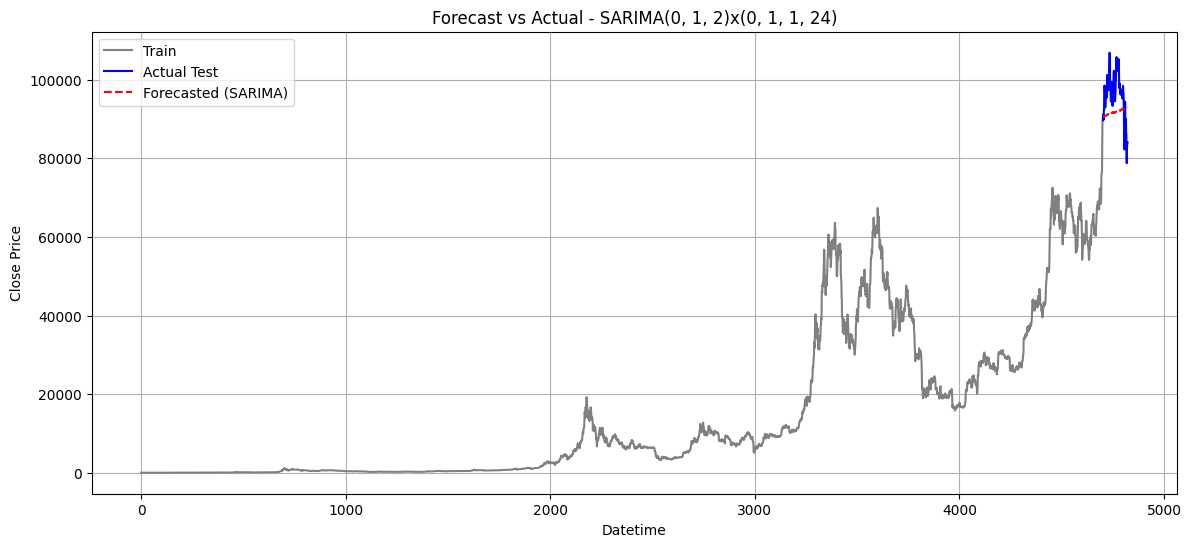

In [ ]:
from sklearn.metrics import r2_score

y_train = train['Close'].dropna()
y_test = test['Close'].dropna()

# Grid search for SARIMA(p, 1, q)(P,D,Q,s) using AIC
max_p = 2
max_q = 2
max_P = 1
max_D = 1
max_Q = 1
s = 24
d = 1
aic_results = []

for p in range(max_p + 1):
    for q in range(max_q + 1):
        for P in range(max_P + 1):
            for D in range(max_D + 1):
                for Q in range(max_Q + 1):
                    try:
                        model = SARIMAX(y_train, order=(p, d, q), seasonal_order=(P, D, Q, s))
                        results = model.fit(disp=False)
                        aic_results.append({
                            'p': p, 'd': d, 'q': q,
                            'P': P, 'D': D, 'Q': Q,
                            'AIC': results.aic
                        })
                    except:
                        continue

aic_df = pd.DataFrame(aic_results).sort_values(by='AIC').reset_index(drop=True)
aic_df['order'] = aic_df.apply(lambda row: f"({row['p']},{row['d']},{row['q']})({row['P']},{row['D']},{row['Q']},{s})", axis=1)
print("Top 5 SARIMA(p,d,q)(P,D,Q,s) combinations with lowest AIC:")
print(aic_df.head(5))

aic_df['model_id'] = ['M' + str(i) for i in range(len(aic_df))]

plt.figure(figsize=(14, 6))
sns.lineplot(data=aic_df, x='model_id', y='AIC', marker='o')
plt.xticks(rotation=90)
plt.title("AIC vs SARIMA Order (ID Labels)")
plt.xlabel("Model ID")
plt.ylabel("AIC")
plt.grid(True)
plt.tight_layout()
plt.show()

print(aic_df[['model_id', 'order']].head(10))

best = aic_df.iloc[0]
best_order = (int(best['p']), int(best['d']), int(best['q']))
best_seasonal_order = (int(best['P']), int(best['D']), int(best['Q']), s)

print(f"\nBest SARIMA Order: {best_order} Seasonal: {best_seasonal_order}\n")

best_model = SARIMAX(y_train, order=best_order, seasonal_order=best_seasonal_order).fit(disp=False)
print("Model Summary:")
print(best_model.summary())

residuals = best_model.resid

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(residuals)
plt.title('Residuals')

plt.subplot(2, 2, 2)
plot_acf(residuals, ax=plt.gca(), lags=40)
plt.title('ACF of Residuals')

plt.subplot(2, 2, 3)
plot_pacf(residuals, ax=plt.gca(), lags=40)
plt.title('PACF of Residuals')

plt.subplot(2, 2, 4)
qqplot(residuals, line='s', ax=plt.gca())
plt.title('QQ Plot of Residuals')

plt.tight_layout()
plt.show()


forecast = best_model.forecast(steps=len(y_test))


mae = mean_absolute_error(y_test, forecast)
rmse = np.sqrt(mean_squared_error(y_test, forecast))
mape = np.mean(np.abs((y_test - forecast) / y_test)) * 100
r2 = r2_score(y_test, forecast)

print("\nEvaluation Metrics on Test Set:")
print(f"MAE  (Mean Absolute Error):           {mae:.2f}")
print(f"RMSE (Root Mean Squared Error):       {rmse:.2f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")
print(f"R²    (Coefficient of Determination):  {r2:.4f}")


plt.figure(figsize=(14, 6))
plt.plot(y_train.index, y_train, label='Train', color='gray')
plt.plot(y_test.index, y_test, label='Actual Test', color='blue')
plt.plot(y_test.index, forecast, label='Forecasted (SARIMA)', color='red', linestyle='--')
plt.title(f"Forecast vs Actual - SARIMA{best_order}x{best_seasonal_order}")
plt.xlabel("Datetime")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
!pip install tensorflow

In [ ]:
print("Train dataset columns:", train.columns)
print("Test dataset columns:", test.columns)

print("\nTrain dataset head:\n", train.head())
print("\nTest dataset head:\n", test.head())

Train dataset columns: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'price_up', 'Close_diff',
       'price_range', 'close_open_diff', 'day_of_week'],
      dtype='object')
Test dataset columns: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'price_up', 'Close_diff',
       'price_range', 'close_open_diff', 'day_of_week'],
      dtype='object')

Train dataset head:
                                Open      High       Low     Close    Volume  \
datetime                                                                      
2012-01-01 00:00:00+00:00  4.645619  4.645619  4.645619  4.645619  0.011905   
2012-01-02 00:00:00+00:00  4.975000  4.975000  4.975000  4.975000  0.007014   
2012-01-03 00:00:00+00:00  5.085500  5.085500  5.085500  5.085500  0.074365   
2012-01-04 00:00:00+00:00  5.170250  5.170396  5.170250  5.170396  0.074468   
2012-01-05 00:00:00+00:00  5.954292  5.954361  5.954292  5.954361  0.048839   

                           price_up  Close_diff  price_range  close_ope

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import TimeSeriesSplit


train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])
train.set_index('datetime', inplace=True)
test.set_index('datetime', inplace=True)

# Feature Engineering
for df_ in [train, test]:
    df_['price_range'] = df_['High'] - df_['Low']
    df_['close_open_diff'] = df_['Close'] - df_['Open']
    df_['day_of_week'] = df_.index.dayofweek

exog_features = ['price_range', 'close_open_diff', 'Volume', 'day_of_week']
y_train = train['Close']
X_train = train[exog_features]
y_test = test['Close']
X_test = test[exog_features]

# Best SARIMAX Order
best_order = (2, 1, 1)
best_seasonal_order = (0, 1, 1, 7)


model = SARIMAX(y_train, exog=X_train, order=best_order, seasonal_order=best_seasonal_order)
results = model.fit(disp=False)
print("Best SARIMAX order:", best_order, "x", best_seasonal_order)
print(results.summary())

# Rolling Forecast
rolling_predictions = []
train_copy = y_train.copy()

for i in range(len(y_test)):
    exog_all = pd.concat([X_train, X_test.iloc[:i]])
    exog_train_aligned = exog_all.iloc[:len(train_copy)].copy()
    exog_train_aligned.index = train_copy.index

    model = SARIMAX(train_copy, exog=exog_train_aligned, order=best_order, seasonal_order=best_seasonal_order)
    results = model.fit(disp=False)

    exog_test_next = X_test.iloc[i:i+1].copy()
    exog_test_next.index = [y_test.index[i]]

    forecast = results.forecast(steps=1, exog=exog_test_next)
    rolling_predictions.append(forecast.iloc[0])


    new_point = pd.Series(y_test.iloc[i], index=[y_test.index[i]])
    train_copy = pd.concat([train_copy, new_point])

plt.figure(figsize=(14, 6))
plt.plot(y_train.index, y_train, label='Train', color='gray')
plt.plot(y_test.index, y_test, label='Actual Test', color='blue')
plt.plot(y_test.index, rolling_predictions, label='Rolling Forecast', color='red', linestyle='--')
plt.title(f"Forecast vs Actual - SARIMAX{best_order}x{best_seasonal_order} (Daily)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

residuals = y_test - rolling_predictions
residuals = pd.Series(residuals, index=y_test.index)

plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
plt.plot(residuals, label='Residuals', color='purple')
plt.axhline(0, linestyle='--', color='black')
plt.title("Residuals Over Time")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.legend()

plt.subplot(2, 3, 2)
sns.histplot(residuals, bins=30, kde=True, color='green')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")

plt.subplot(2, 3, 3)
sns.boxplot(x=residuals, color='orange')
plt.title("Boxplot of Residuals")

plt.subplot(2, 3, 4)
pd.plotting.autocorrelation_plot(residuals)
plt.title("Autocorrelation of Residuals")

plt.subplot(2, 3, 5)
qqplot(residuals, line='s', ax=plt.gca())
plt.title("Q-Q Plot of Residuals")

plt.tight_layout()
plt.show()

# TimeSeries Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)
cv_scores = []

for train_idx, val_idx in tscv.split(y_train):
    train_cv, val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]
    exog_train_cv, exog_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]

    model = SARIMAX(train_cv, exog=exog_train_cv, order=best_order, seasonal_order=best_seasonal_order)
    results = model.fit(disp=False)
    pred = results.forecast(steps=len(val_cv), exog=exog_val_cv)

    mse = mean_squared_error(val_cv, pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(val_cv, pred)
    r2 = r2_score(val_cv, pred)
    cv_scores.append((mse, rmse, mae, r2))

cv_df = pd.DataFrame(cv_scores, columns=['MSE', 'RMSE', 'MAE', 'R²'])
print("\nCross-Validation Averages:")
print(cv_df.mean())

# Feature Importance (Correlation)
corr_matrix = train[exog_features + ['Close']].corr()
print("\nFeature Correlations with Close:")
print(corr_matrix[['Close']].sort_values(by='Close', ascending=False))

mse = mean_squared_error(y_test, rolling_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, rolling_predictions)
r2 = r2_score(y_test, rolling_predictions)

print(f"\nFinal Evaluation Metrics:\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\nR²: {r2:.4f}")



Best SARIMAX order: (2, 1, 1) x (0, 1, 1, 7)
                                     SARIMAX Results                                     
Dep. Variable:                             Close   No. Observations:                 4702
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 7)   Log Likelihood              -36976.118
Date:                           Sat, 19 Apr 2025   AIC                          73970.237
Time:                                   11:23:15   BIC                          74028.323
Sample:                               01-01-2012   HQIC                         73990.660
                                    - 11-14-2024                                         
Covariance Type:                             opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
price_range       -17.6242      0.425    -41.467      0.000     -18

LinAlgError: LU decomposition error.

Best SARIMAX order: (2, 1, 1) x (0, 1, 1, 7)
                                     SARIMAX Results                                     
Dep. Variable:                             Close   No. Observations:                 4702
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 7)   Log Likelihood              -37274.119
Date:                           Sat, 19 Apr 2025   AIC                          74566.237
Time:                                   22:22:01   BIC                          74624.306
Sample:                               01-01-2012   HQIC                         74586.657
                                    - 11-14-2024                                         
Covariance Type:                             opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
price_range       -11.2354      0.738    -15.231      0.000     -12

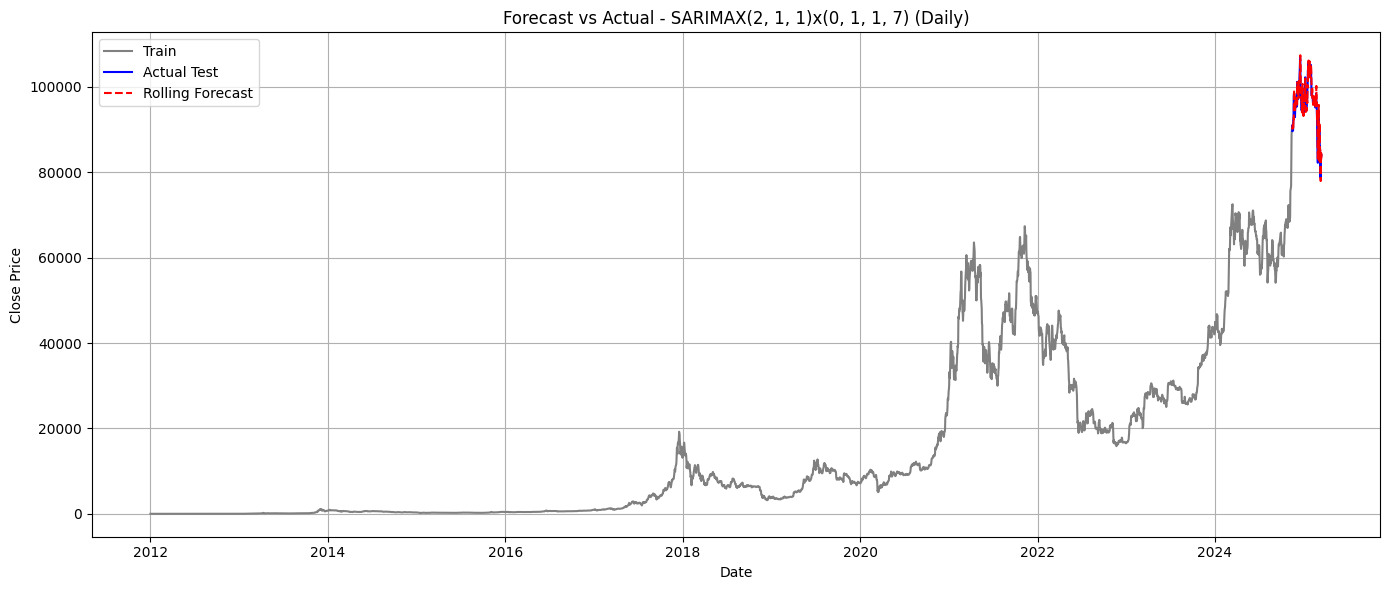

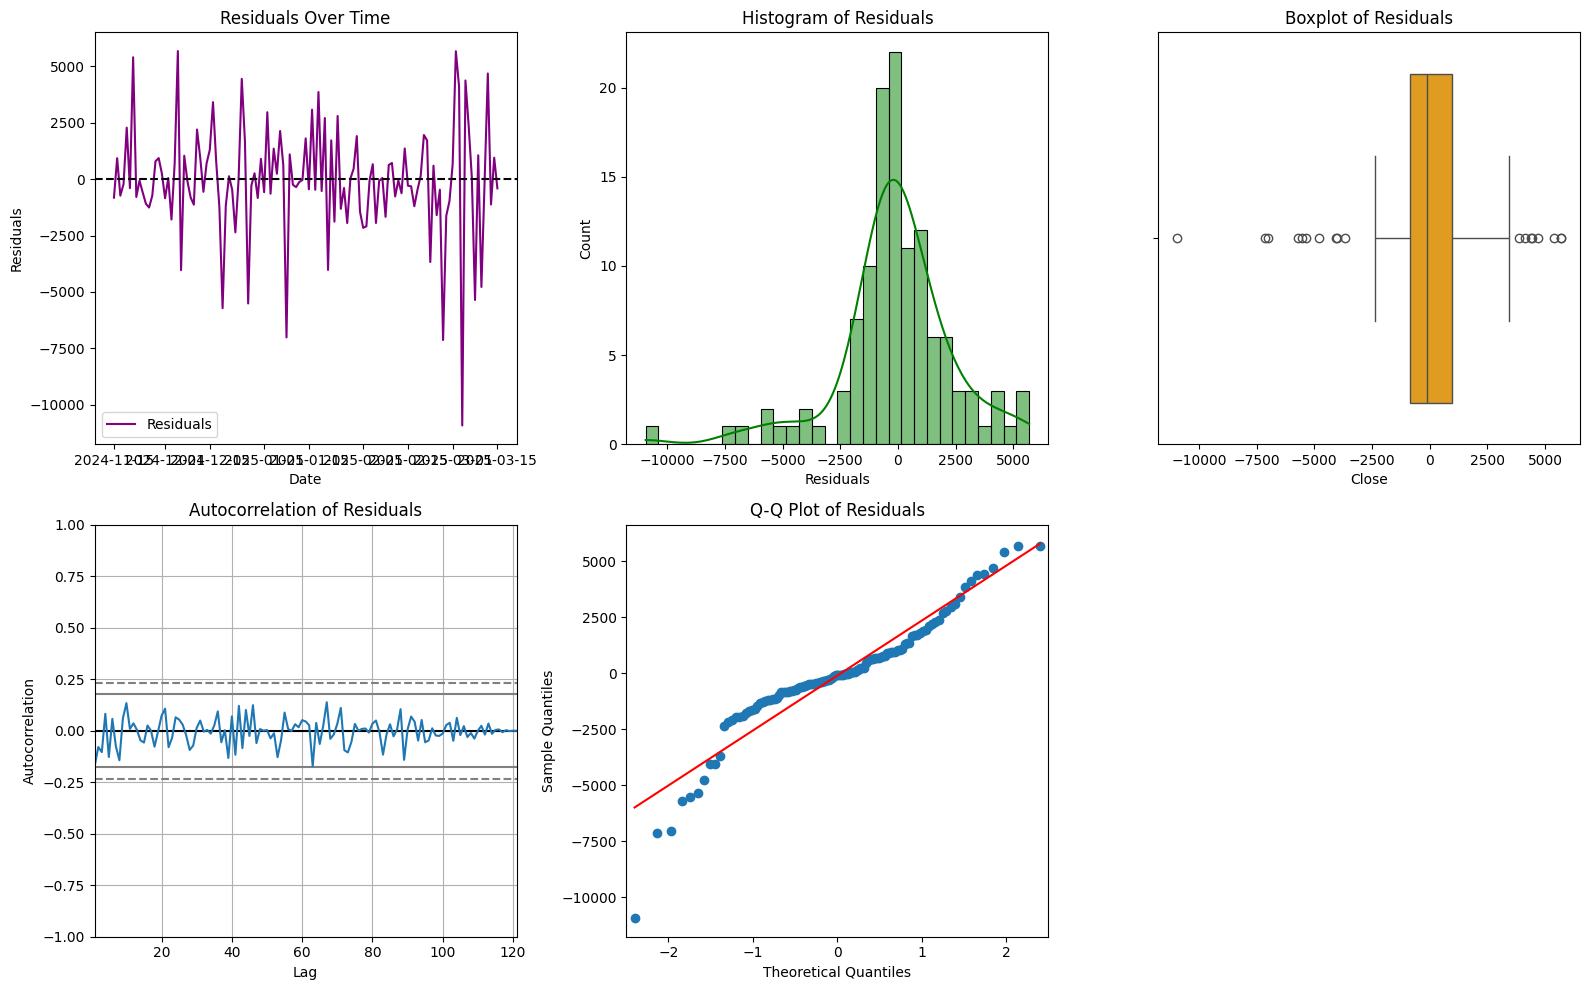


Cross-Validation Averages:
MSE     3.108366e+08
RMSE    1.269180e+04
MAE     9.946365e+03
R²     -3.797685e+00
dtype: float64

Feature Correlations with Close:
                    Close
Close            1.000000
price_range      0.728088
close_open_diff  0.148720
day_of_week     -0.001271
Volume          -0.305153

Final Evaluation Metrics:
RMSE: 2458.46
MAE: 1640.35
R²: 0.8218


In [ ]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])
train.set_index('datetime', inplace=True)
test.set_index('datetime', inplace=True)

for df_ in [train, test]:
    df_['price_range'] = df_['High'] - df_['Low']
    df_['close_open_diff'] = df_['Close'] - df_['Open']
    df_['day_of_week'] = df_.index.dayofweek

exog_features = ['price_range', 'close_open_diff', 'Volume', 'day_of_week']
y_train = train['Close']
X_train = train[exog_features]
y_test = test['Close']
X_test = test[exog_features]

best_order = (2, 1, 1)
best_seasonal_order = (0, 1, 1, 7)


model = SARIMAX(y_train, exog=X_train, order=best_order, seasonal_order=best_seasonal_order,
                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)
print("Best SARIMAX order:", best_order, "x", best_seasonal_order)
print(results.summary())

rolling_predictions = []
train_copy = y_train.copy()
exog_all = pd.concat([X_train, X_test])

for i in range(len(y_test)):
    exog_train_aligned = exog_all.iloc[:len(train_copy)].copy()
    exog_train_aligned.index = train_copy.index

    try:
        model = SARIMAX(train_copy, exog=exog_train_aligned, order=best_order,
                        seasonal_order=best_seasonal_order,
                        enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit(disp=False)

        exog_test_next = X_test.iloc[i:i+1].copy()
        exog_test_next.index = [y_test.index[i]]

        forecast = results.forecast(steps=1, exog=exog_test_next)
        rolling_predictions.append(forecast.iloc[0])
    except Exception as e:
        print(f"Error at step {i}: {e}")
        rolling_predictions.append(np.nan)


    new_point = pd.Series(y_test.iloc[i], index=[y_test.index[i]])
    train_copy = pd.concat([train_copy, new_point])


plt.figure(figsize=(14, 6))
plt.plot(y_train.index, y_train, label='Train', color='gray')
plt.plot(y_test.index, y_test, label='Actual Test', color='blue')
plt.plot(y_test.index, rolling_predictions, label='Rolling Forecast', color='red', linestyle='--')
plt.title(f"Forecast vs Actual - SARIMAX{best_order}x{best_seasonal_order} (Daily)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


residuals = y_test - rolling_predictions
residuals = pd.Series(residuals, index=y_test.index)

plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
plt.plot(residuals, label='Residuals', color='purple')
plt.axhline(0, linestyle='--', color='black')
plt.title("Residuals Over Time")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.legend()

plt.subplot(2, 3, 2)
sns.histplot(residuals, bins=30, kde=True, color='green')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")

plt.subplot(2, 3, 3)
sns.boxplot(x=residuals, color='orange')
plt.title("Boxplot of Residuals")

plt.subplot(2, 3, 4)
pd.plotting.autocorrelation_plot(residuals)
plt.title("Autocorrelation of Residuals")

plt.subplot(2, 3, 5)
qqplot(residuals, line='s', ax=plt.gca())
plt.title("Q-Q Plot of Residuals")

plt.tight_layout()
plt.show()


tscv = TimeSeriesSplit(n_splits=5)
cv_scores = []

for train_idx, val_idx in tscv.split(y_train):
    train_cv, val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]
    exog_train_cv, exog_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]

    model = SARIMAX(train_cv, exog=exog_train_cv, order=best_order,
                    seasonal_order=best_seasonal_order,
                    enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit(disp=False)
    pred = results.forecast(steps=len(val_cv), exog=exog_val_cv)

    mse = mean_squared_error(val_cv, pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(val_cv, pred)
    r2 = r2_score(val_cv, pred)
    cv_scores.append((mse, rmse, mae, r2))

cv_df = pd.DataFrame(cv_scores, columns=['MSE', 'RMSE', 'MAE', 'R²'])
print("\nCross-Validation Averages:")
print(cv_df.mean())


corr_matrix = train[exog_features + ['Close']].corr()
print("\nFeature Correlations with Close:")
print(corr_matrix[['Close']].sort_values(by='Close', ascending=False))


mse = mean_squared_error(y_test, rolling_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, rolling_predictions)
r2 = r2_score(y_test, rolling_predictions)

print(f"\nFinal Evaluation Metrics:\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\nR²: {r2:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - loss: 6.1352e-04 - val_loss: 1.3523e-04
Epoch 2/20
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 6.8233e-06 - val_loss: 5.9808e-05
Epoch 3/20
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 4.5753e-06 - val_loss: 1.8165e-05
Epoch 4/20
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 3.1121e-06 - val_loss: 1.2833e-05
Epoch 5/20
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 2.5097e-06 - val_loss: 1.2969e-05
Epoch 6/20
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 2.0523e-06 - val_loss: 6.8930e-06
Epoch 7/20
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 2.0653e-06 - val_loss: 8.5009e-06
Epoch 8/20
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 1.9480e-06 - val_loss: 1.0591e-05
Epoch 9/20
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 1.8467e-06 - val_loss: 1.2173e-05
Epoch 10/20
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 1.8360e-06 - val_loss: 7.2427e-06
Epoch 11/20
2829/2829 ━━━━━━━

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


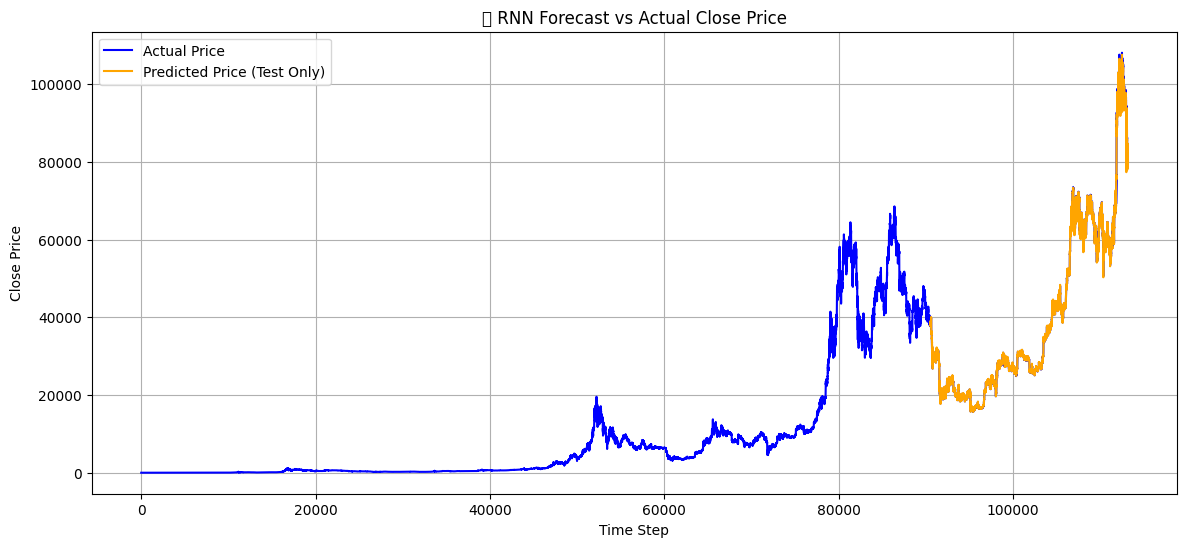

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

data = df_hourly[['Close']].dropna()

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i + seq_len])
        y.append(data[i + seq_len])
    return np.array(X), np.array(y)

SEQ_LEN = 24
X, y = create_sequences(scaled_data, SEQ_LEN)


split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Build RNN Model
model = Sequential()
model.add(SimpleRNN(50, activation='tanh', input_shape=(SEQ_LEN, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_data=(X_test, y_test), verbose=1)

predictions = model.predict(X_test)

predicted_prices = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test)

rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
mae = mean_absolute_error(actual_prices, predicted_prices)
r2 = r2_score(actual_prices, predicted_prices)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(actual_prices, predicted_prices)

print(f" RMSE: {rmse:.4f}")
print(f" MAE:  {mae:.4f}")
print(f" R² Score: {r2:.4f}")
print(f" MAPE: {mape:.2f}%")

full_actual = scaler.inverse_transform(scaled_data[SEQ_LEN:])
full_pred = np.empty_like(full_actual)
full_pred[:] = np.nan
full_pred[split_idx:] = predicted_prices

plt.figure(figsize=(14, 6))
plt.plot(full_actual, label='Actual Price', color='blue')
plt.plot(full_pred, label='Predicted Price (Test Only)', color='orange')
plt.title("RNN Forecast vs Actual Close Price")
plt.xlabel("Time Step")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - loss: 5.0804e-04 - val_loss: 4.5956e-05
Epoch 2/20
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - loss: 7.1603e-06 - val_loss: 1.6827e-05
Epoch 3/20
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - loss: 4.9234e-06 - val_loss: 1.2260e-05
Epoch 4/20
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - loss: 3.4463e-06 - val_loss: 1.4360e-05
Epoch 5/20
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 36s 13ms/step - loss: 2.8147e-06 - val_loss: 1.2600e-05
Epoch 6/20
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 2.3042e-06 - val_loss: 9.3160e-06
Epoch 7/20
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - loss: 2.0325e-06 - val_loss: 7.6847e-06
Epoch 8/20
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - loss: 1.7856e-06 - val_loss: 8.4533e-06
Epoch 9/20
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - loss: 1.8197e-06 - val_loss: 9.6706e-06
Epoch 10/20
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - loss: 1.8397e-06 - val_loss: 7.9479e-06
Epoch 11/20
2829/28

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


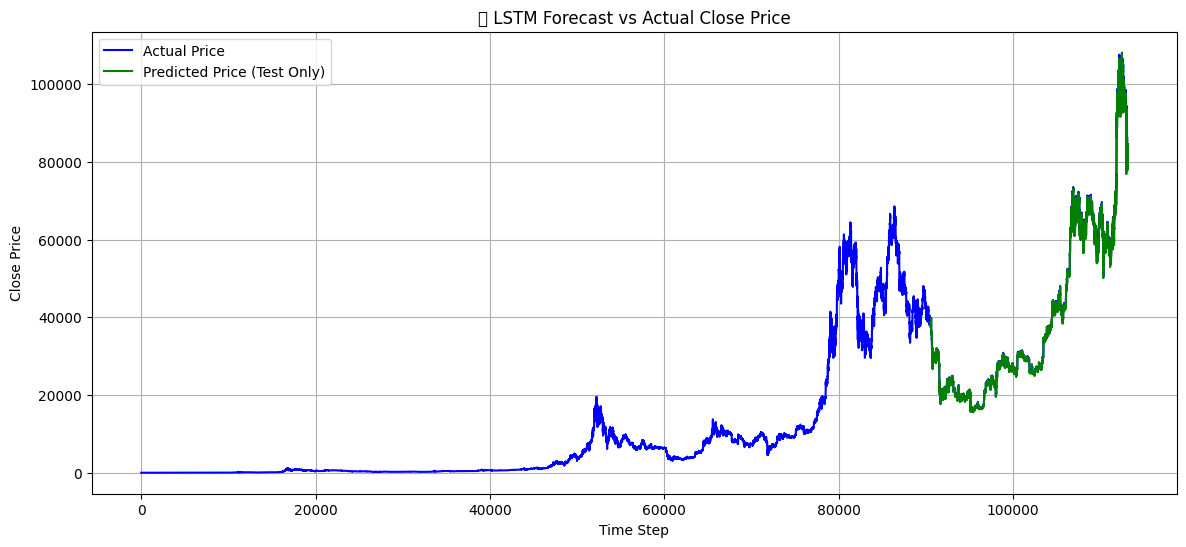

In [ ]:
from tensorflow.keras.layers import LSTM, Dense

data = df_hourly[['Close']].dropna()

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i + seq_len])
        y.append(data[i + seq_len])
    return np.array(X), np.array(y)

SEQ_LEN = 24
X, y = create_sequences(scaled_data, SEQ_LEN)


X = X.reshape((X.shape[0], X.shape[1], 1))

split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

#  Build LSTM Model
model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape=(SEQ_LEN, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_data=(X_test, y_test), verbose=1)

predictions = model.predict(X_test)

predicted_prices = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test)

rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
mae = mean_absolute_error(actual_prices, predicted_prices)
r2 = r2_score(actual_prices, predicted_prices)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(actual_prices, predicted_prices)

print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")

full_actual = scaler.inverse_transform(scaled_data[SEQ_LEN:])
full_pred = np.empty_like(full_actual)
full_pred[:] = np.nan
full_pred[split_idx:] = predicted_prices

plt.figure(figsize=(14, 6))
plt.plot(full_actual, label='Actual Price', color='blue')
plt.plot(full_pred, label='Predicted Price (Test Only)', color='green')
plt.title("LSTM Forecast vs Actual Close Price")
plt.xlabel("Time Step")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2829/2829 ━━━━━━━━━━━━━━━━━━━━ 54s 18ms/step - loss: 3.0955e-04 - val_loss: 1.1524e-05
Epoch 2/20
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 76s 16ms/step - loss: 3.4077e-06 - val_loss: 1.7234e-05
Epoch 3/20
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 82s 16ms/step - loss: 2.9301e-06 - val_loss: 1.2590e-05
Epoch 4/20
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 45s 16ms/step - loss: 2.5436e-06 - val_loss: 9.1884e-06
Epoch 5/20
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 46s 16ms/step - loss: 2.1996e-06 - val_loss: 9.5893e-06
Epoch 6/20
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 82s 16ms/step - loss: 2.0596e-06 - val_loss: 7.4217e-06
Epoch 7/20
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 83s 17ms/step - loss: 1.9566e-06 - val_loss: 6.5590e-06
Epoch 8/20
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 81s 16ms/step - loss: 1.8970e-06 - val_loss: 7.4094e-06
Epoch 9/20
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 80s 15ms/step - loss: 1.9778e-06 - val_loss: 7.0698e-06
Epoch 10/20
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 84s 16ms/step - loss: 2.0428e-06 - val_loss: 6.3235e-06
Epoch 11/20
2829/2829 ━━━━━━━━

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


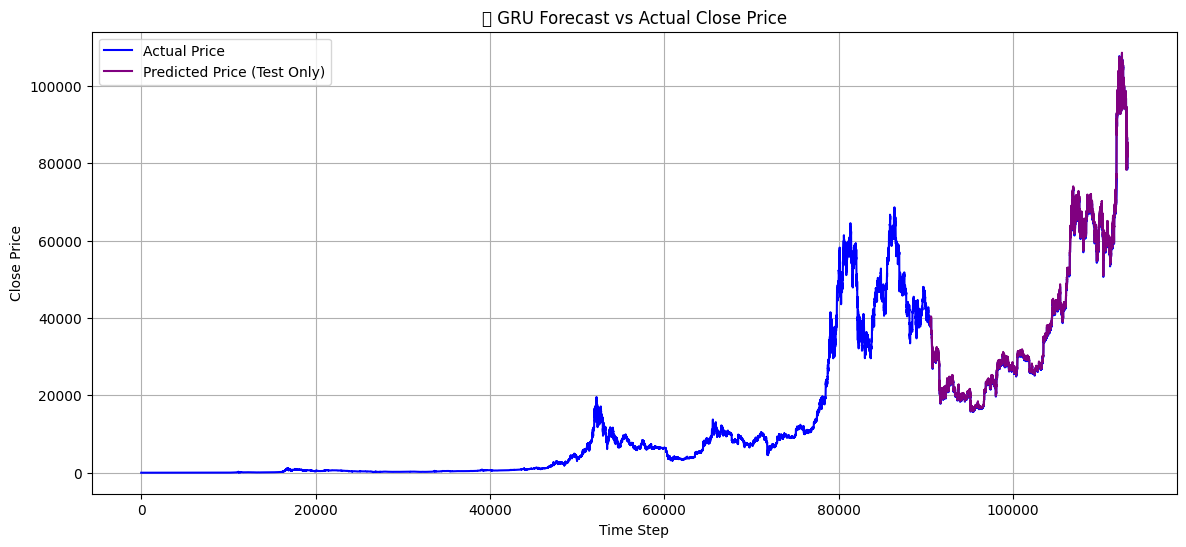

In [ ]:
from tensorflow.keras.layers import GRU, Dense
data = df_hourly[['Close']].dropna()

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i + seq_len])
        y.append(data[i + seq_len])
    return np.array(X), np.array(y)

SEQ_LEN = 24
X, y = create_sequences(scaled_data, SEQ_LEN)
X = X.reshape((X.shape[0], X.shape[1], 1))

split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Build GRU Model
model = Sequential()
model.add(GRU(50, activation='tanh', input_shape=(SEQ_LEN, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_data=(X_test, y_test), verbose=1)

predictions = model.predict(X_test)

predicted_prices = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test)

rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
mae = mean_absolute_error(actual_prices, predicted_prices)
r2 = r2_score(actual_prices, predicted_prices)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(actual_prices, predicted_prices)

print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")

full_actual = scaler.inverse_transform(scaled_data[SEQ_LEN:])
full_pred = np.empty_like(full_actual)
full_pred[:] = np.nan
full_pred[split_idx:] = predicted_prices

plt.figure(figsize=(14, 6))
plt.plot(full_actual, label='Actual Price', color='blue')
plt.plot(full_pred, label='Predicted Price (Test Only)', color='purple')
plt.title("GRU Forecast vs Actual Close Price")
plt.xlabel("Time Step")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()



🧪 Testing config: {'units': 50, 'dropout': 0.2, 'batch_size': 32}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


694/694 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


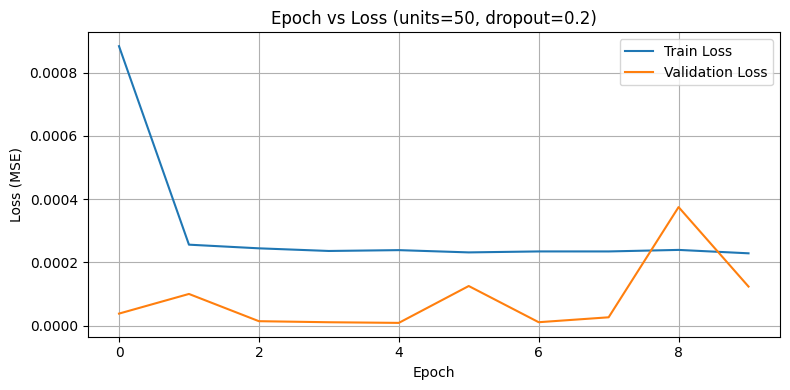


🧪 Testing config: {'units': 64, 'dropout': 0.3, 'batch_size': 32}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


694/694 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


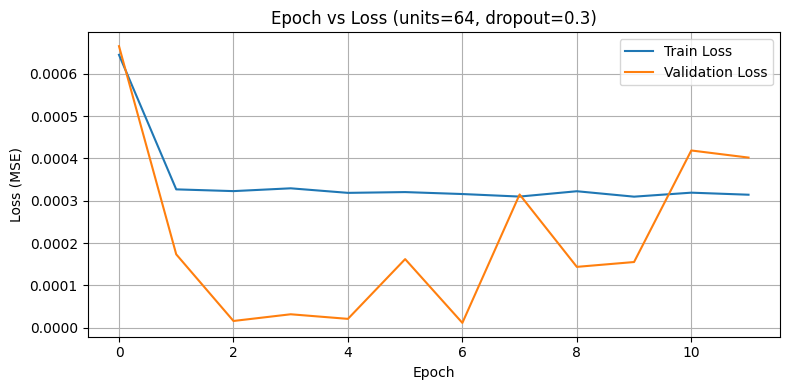


🧪 Testing config: {'units': 100, 'dropout': 0.2, 'batch_size': 16}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


694/694 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step


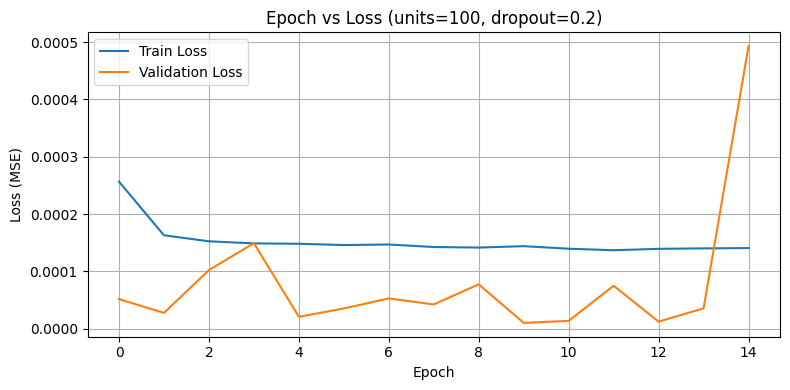


✅ Best Config: {'units': 50, 'dropout': 0.2, 'batch_size': 32}
📉 RMSE: 211.4276
📊 MAE:  126.9273
📈 R² Score: 0.9998
📐 MAPE: 0.35%


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


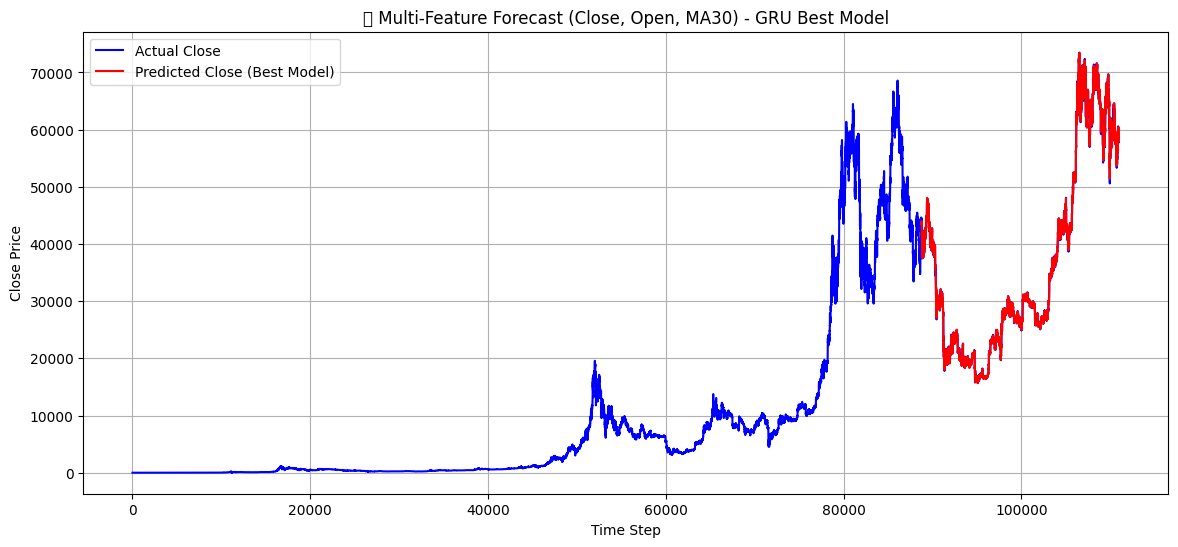

In [ ]:
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

df = df_hourly[['Close', 'Open']].copy()
df['MA30'] = df['Close'].rolling(window=30).mean()
df.dropna(inplace=True)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Close', 'Open', 'MA30']])

def create_multivariate_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i + seq_len])
        y.append(data[i + seq_len][0])
    return np.array(X), np.array(y)

SEQ_LEN = 24
X, y = create_multivariate_sequences(scaled_data, SEQ_LEN)


split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Hyperparameter options
param_grid = [
    {'units': 50, 'dropout': 0.2, 'batch_size': 32},
    {'units': 64, 'dropout': 0.3, 'batch_size': 32},
    {'units': 100, 'dropout': 0.2, 'batch_size': 16},
]

best_model = None
best_score = float('inf')
best_config = None

for config in param_grid:
    print(f"\n Testing config: {config}")

    model = Sequential()
    model.add(GRU(config['units'], activation='tanh', return_sequences=False,
                  input_shape=(SEQ_LEN, X.shape[2])))
    model.add(Dropout(config['dropout']))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(X_train, y_train, epochs=100,
                        batch_size=config['batch_size'],
                        validation_data=(X_test, y_test),
                        callbacks=[early_stop], verbose=0)


    predictions = model.predict(X_test)
    predicted_close = scaler.inverse_transform(
        np.concatenate([predictions, np.zeros((len(predictions), 2))], axis=1))[:, 0]
    actual_close = scaler.inverse_transform(
        np.concatenate([y_test.reshape(-1, 1), np.zeros((len(y_test), 2))], axis=1))[:, 0]

    rmse = np.sqrt(mean_squared_error(actual_close, predicted_close))

    if rmse < best_score:
        best_score = rmse
        best_model = model
        best_config = config
        best_history = history
        best_pred = predicted_close
        best_actual = actual_close

    # Plot loss per epoch
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"Epoch vs Loss (units={config['units']}, dropout={config['dropout']})")
    plt.xlabel("Epoch")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

final_rmse = np.sqrt(mean_squared_error(best_actual, best_pred))
final_mae = mean_absolute_error(best_actual, best_pred)
final_r2 = r2_score(best_actual, best_pred)
final_mape = mape(best_actual, best_pred)

print(f"\n Best Config: {best_config}")
print(f"RMSE: {final_rmse:.4f}")
print(f"MAE:  {final_mae:.4f}")
print(f"R² Score: {final_r2:.4f}")
print(f"MAPE: {final_mape:.2f}%")

full_actual = scaler.inverse_transform(scaled_data[SEQ_LEN:])[:, 0]
full_pred = np.empty_like(full_actual)
full_pred[:] = np.nan
full_pred[split_idx:] = best_pred

plt.figure(figsize=(14, 6))
plt.plot(full_actual, label='Actual Close', color='blue')
plt.plot(full_pred, label='Predicted Close (Best Model)', color='red')
plt.title("Multi-Feature Forecast (Close, Open, MA30) - GRU Best Model")
plt.xlabel("Time Step")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 66s 21ms/step - loss: 6.9584e-04 - val_loss: 1.1002e-05
Epoch 2/20
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 46s 17ms/step - loss: 7.6338e-06 - val_loss: 3.7433e-05
Epoch 3/20
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 82s 17ms/step - loss: 6.4399e-06 - val_loss: 8.9256e-06
Epoch 4/20
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 91s 20ms/step - loss: 6.0481e-06 - val_loss: 6.8317e-06
Epoch 5/20
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 71s 16ms/step - loss: 4.9459e-06 - val_loss: 6.9027e-06
Epoch 6/20
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 43s 16ms/step - loss: 4.1018e-06 - val_loss: 6.1922e-06
Epoch 7/20
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 86s 17ms/step - loss: 4.5086e-06 - val_loss: 1.6217e-05
Epoch 8/20
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 79s 16ms/step - loss: 4.4071e-06 - val_loss: 8.0855e-06
Epoch 9/20
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 83s 16ms/step - loss: 4.7167e-06 - val_loss: 2.0365e-05
Epoch 10/20
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 81s 16ms/step - loss: 4.5283e-06 - val_loss: 1.2515e-05
Epoch 11/20
2775/27

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


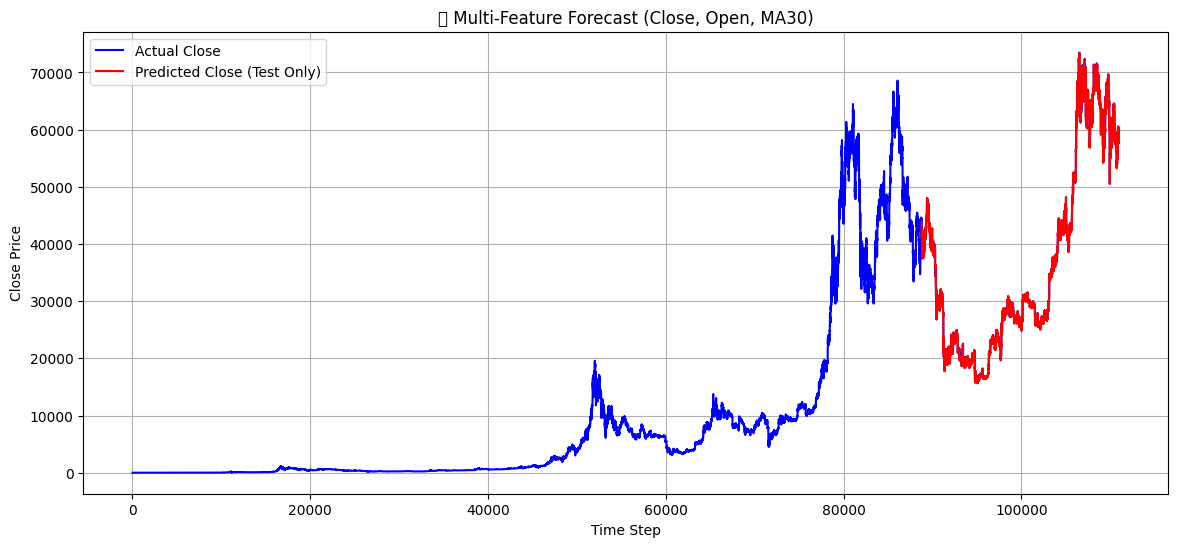

In [ ]:
from tensorflow.keras.layers import SimpleRNN

df = df_hourly[['Close', 'Open']].copy()
df['MA30'] = df['Close'].rolling(window=30).mean()
df.dropna(inplace=True)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Close', 'Open', 'MA30']])

def create_multivariate_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i + seq_len])
        y.append(data[i + seq_len][0])
    return np.array(X), np.array(y)

SEQ_LEN = 24
X, y = create_multivariate_sequences(scaled_data, SEQ_LEN)

split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

model = Sequential()
model.add(GRU(50, activation='tanh', input_shape=(SEQ_LEN, X.shape[2])))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_data=(X_test, y_test), verbose=1)

predictions = model.predict(X_test)
predicted_close = scaler.inverse_transform(
    np.concatenate([predictions, np.zeros((len(predictions), 2))], axis=1))[:, 0]
actual_close = scaler.inverse_transform(
    np.concatenate([y_test.reshape(-1, 1), np.zeros((len(y_test), 2))], axis=1))[:, 0]

rmse = np.sqrt(mean_squared_error(actual_close, predicted_close))
mae = mean_absolute_error(actual_close, predicted_close)
r2 = r2_score(actual_close, predicted_close)

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_val = mape(actual_close, predicted_close)

print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"MAPE: {mape_val:.2f}%")

full_actual = scaler.inverse_transform(scaled_data[SEQ_LEN:])[:, 0]
full_pred = np.empty_like(full_actual)
full_pred[:] = np.nan
full_pred[split_idx:] = predicted_close

plt.figure(figsize=(14, 6))
plt.plot(full_actual, label='Actual Close', color='blue')
plt.plot(full_pred, label='Predicted Close (Test Only)', color='red')
plt.title("Multi-Feature Forecast (Close, Open, MA30)")
plt.xlabel("Time Step")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


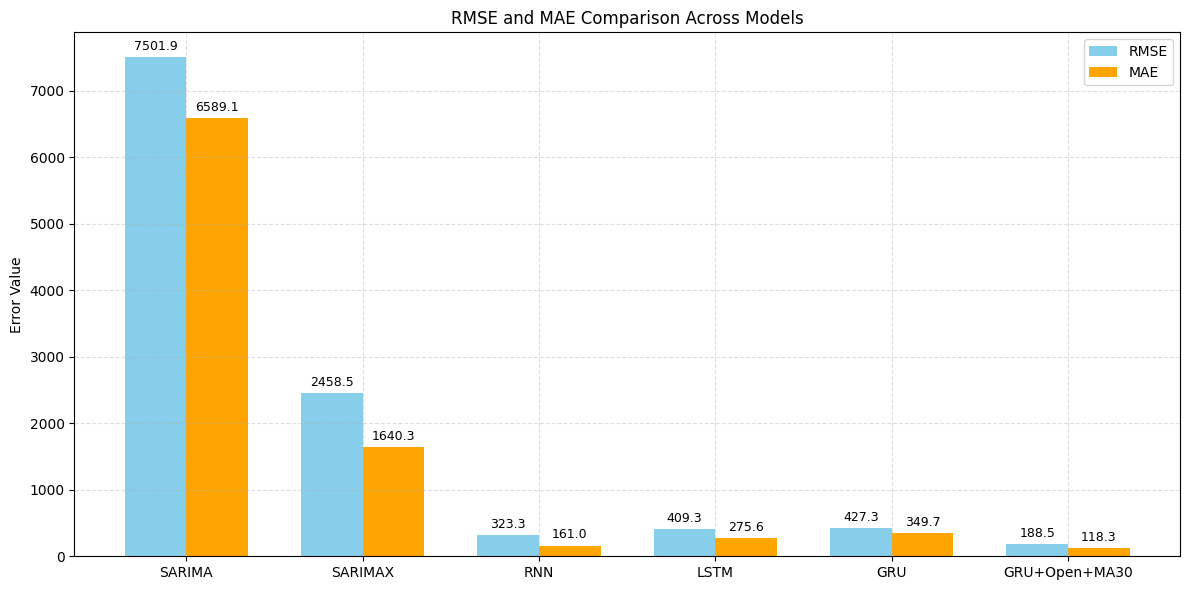

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

metrics = {
    "SARIMA": {"RMSE": 7501.86, "MAE": 6589.07},
    "SARIMAX": {"RMSE": 2458.46, "MAE": 1640.35 },
    "RNN": {"RMSE": 323.2787, "MAE": 160.9829},
    "LSTM": {"RMSE": 409.3390, "MAE": 275.6240},
    "GRU": {"RMSE": 427.2588, "MAE": 349.6684},
    "GRU+Open+MA30": {"RMSE": 188.4645, "MAE": 118.286}
}

models = list(metrics.keys())
rmse_values = [metrics[model]['RMSE'] for model in models]
mae_values = [metrics[model]['MAE'] for model in models]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rmse_bars = ax.bar(x - width/2, rmse_values, width, label='RMSE', color='skyblue')
mae_bars = ax.bar(x + width/2, mae_values, width, label='MAE', color='orange')

ax.set_ylabel('Error Value')
ax.set_title('RMSE and MAE Comparison Across Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.4)

def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

annotate_bars(rmse_bars)
annotate_bars(mae_bars)

plt.tight_layout()
plt.show()
